# Dry_Bean_Project CT312
Thông tin về tập dữ liệu:

Dự án này sử dụng bảy loại đậu khô khác nhau, xem xét các đặc điểm như hình dáng, hình dáng, loại và cấu trúc dựa trên tình hình thị trường. Sử dụng thuật toán học máy tốt nhất để phân loại bảy loại đậu khô nổi tiếng nhất tại Thổ Nhĩ Kỳ; Barbunya, Bombay, Cali, Dermason, Horoz, Seker và Sira, chỉ dựa vào kích thước và hình dáng của các loại đậu mà không có các đặc điểm phân biệt bên ngoài.

# Thông tin về các Đặc trưng:
1. Area (A): Diện tích của khu vực đậu và số pixel nằm trong ranh giới của nó.
2. Perimeter (P): Chu vi của hạt đậu được định nghĩa là chiều dài của biên của nó.
3. Major axis length (L): Khoảng cách giữa hai đầu của đoạn thẳng dài nhất có thể được vẽ từ một hạt đậu.
4. Minor axis length (l): Đoạn thẳng dài nhất có thể được vẽ từ hạt đậu trong tư thế vuông góc với trục chính.
5. Aspect ratio (K): Xác định mối quan hệ giữa L và l.
6. Eccentricity (Ec): Độ lệch tâm của elip có cùng khoảnh khắc với vùng này.
7. Convex area (C): Số pixel trong đa giác lồi nhỏ nhất có thể chứa
diện tích của một hạt đậu.
8. Equivalent diameter (Ed): Đường kính của một hình tròn có diện tích giống với diện tích của hạt đậu.
9. Extent (Ex): Tỉ lệ giữa số pixel trong hộp giới hạn và diện tích hạt đậu.
10. Solidity (S): Còn được gọi là tính lồi. Tỉ lệ giữa số pixel trong vỏ lồi và các pixel nằm trong hạt đậu.
11. Roundness (R): Tính toán bằng công thức sau: (4piA)/(P^2)
12. Compactness (CO):  Đo lường độ tròn của một đối tượng: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. ShapeFactor4 (SF5)
18. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

# Nhập Các Thư Viện Cho Xử Lý Dữ Liệu, Loading Dữ Liệu

In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics # for calculating rootmean square

# Import Các Thư Viện Trực Quan Hóa Dữ Liệu

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import Các Thư Viện Máy Học

In [5]:
#Các mô hình sẽ được sử dụng
from lazypredict.Supervised import LazyClassifier # cho việc chọn mô hình tốt nhất

# Đánh giá mô hình
from sklearn.metrics import classification_report, accuracy_score, average_precision_score, f1_score

# Tiền xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

# Loading Dữ Liệu

In [ ]:
df=pd.read_excel("Dry_Bean_Dataset.xlsx")

# Phân Tích Dữ Liệu - Exploratory Data Analysis (EDA)

In [21]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,ShapeFactor5
0,28395,610.29,208.18,173.89,1.20,0.55,28715,190.14,0.76,0.99,0.96,0.91,0.01,0.00,0.83,1.00,SEKER,0
1,28734,638.02,200.52,182.73,1.10,0.41,29172,191.27,0.78,0.98,0.89,0.95,0.01,0.00,0.91,1.00,SEKER,0
2,29380,624.11,212.83,175.93,1.21,0.56,29690,193.41,0.78,0.99,0.95,0.91,0.01,0.00,0.83,1.00,SEKER,0
3,30008,645.88,210.56,182.52,1.15,0.50,30724,195.47,0.78,0.98,0.90,0.93,0.01,0.00,0.86,0.99,SEKER,0
4,30140,620.13,201.85,190.28,1.06,0.33,30417,195.90,0.77,0.99,0.98,0.97,0.01,0.00,0.94,1.00,SEKER,0


In [22]:
df.size

244998

In [23]:
df.shape

(13611, 18)

# Mô Tả và Thông Tin Về Tập Dữ Liệu

In [24]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor4,ShapeFactor5
count,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13611.00,13610.00,13611.00,13609.00,13611.00,13610.00,13611.00,13611.00
mean,53048.28,855.28,320.14,202.27,1.58,0.75,53768.20,253.06,0.75,0.99,0.87,0.01,0.00,1.00,0.00
std,29324.10,214.29,85.69,44.97,0.25,0.09,29774.92,59.18,0.08,0.00,0.06,0.00,0.00,0.00,0.00
min,20420.00,524.74,183.60,122.51,1.02,0.22,20684.00,161.24,0.56,0.92,0.49,0.00,0.00,0.95,0.00
25%,36328.00,703.52,253.30,175.85,1.43,0.72,36714.50,215.07,0.72,0.99,0.83,0.01,0.00,0.99,0.00
50%,44652.00,794.94,296.88,192.43,1.55,0.76,45178.00,238.44,0.76,0.99,0.88,0.01,0.00,1.00,0.00
75%,61332.00,977.21,376.50,217.03,1.71,0.81,62294.00,279.45,0.79,0.99,0.92,0.01,0.00,1.00,0.00
max,254616.00,1985.37,738.86,460.20,2.43,0.91,263261.00,569.37,8.78,0.99,0.99,0.01,0.00,1.00,0.00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13610 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13609 non-null  float64
 11  Compactness      13611 non-null  object 
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13610 non-null  float64
 14  ShapeFactor3     13611 non-null  object 
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
 17  ShapeFactor5

# Tiền Xử Lý Dữ Liệu

## Tìm Những Giá Trị là Chuỗi

In [26]:
import pandas as pd

def check_string():
    for column in df.columns:
        if column != 'Class':
            print(f"Kiểm tra giá trị trong các cột '{column}':")
            for value in df[column]:
                if isinstance(value, str):
                    print(f"'{value}' là một chuỗi.")
check_string()

Kiểm tra giá trị trong các cột 'Area':
Kiểm tra giá trị trong các cột 'Perimeter':
Kiểm tra giá trị trong các cột 'MajorAxisLength':
Kiểm tra giá trị trong các cột 'MinorAxisLength':
Kiểm tra giá trị trong các cột 'AspectRation':
Kiểm tra giá trị trong các cột 'Eccentricity':
Kiểm tra giá trị trong các cột 'ConvexArea':
Kiểm tra giá trị trong các cột 'EquivDiameter':
Kiểm tra giá trị trong các cột 'Extent':
Kiểm tra giá trị trong các cột 'Solidity':
Kiểm tra giá trị trong các cột 'roundness':
Kiểm tra giá trị trong các cột 'Compactness':
'0,946067007041207' là một chuỗi.
Kiểm tra giá trị trong các cột 'ShapeFactor1':
Kiểm tra giá trị trong các cột 'ShapeFactor2':
Kiểm tra giá trị trong các cột 'ShapeFactor3':
'0,822485887175113' là một chuỗi.
Kiểm tra giá trị trong các cột 'ShapeFactor4':
Kiểm tra giá trị trong các cột 'ShapeFactor5':


In [27]:

# Đổi dữ liệu cột String về dữ liệu kiểu số (float)
def transfer_string_to_float_data(dataset_name, features):
    for col in features:
        col_values = dataset_name[col]
        for index, value in enumerate(dataset_name[col]):
            if isinstance(value, str):
                dataset_name.at[index, col] = float(value.replace(',', '.'))
    return dataset_name

string_value = ['Compactness', 'ShapeFactor3']
df = transfer_string_to_float_data(df, string_value)

## Kiểm tra Giá Trị Null

In [28]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             1
Solidity           0
roundness          2
Compactness        0
ShapeFactor1       0
ShapeFactor2       1
ShapeFactor3       0
ShapeFactor4       0
Class              0
ShapeFactor5       0
dtype: int64

In [29]:
df = df.fillna(method='ffill') # 'pad', 'ffill' đổ dữ liệu bằng với dữ liệu giá trị sau hoặc trước
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
ShapeFactor5       0
dtype: int64


## Tìm Dữ Liệu Trùng lặp và Xoá đi

In [30]:
df.drop_duplicates(inplace=True)

## Tìm Sự Chênh Lệch (skewness) Trong Dữ liệu.

In [31]:
df['Extent'] = np.log(df['Extent'])
df.skew().sort_values(ascending=True)

ShapeFactor4      -2.76
Solidity          -2.55
Eccentricity      -1.06
roundness         -0.65
ShapeFactor1      -0.53
ShapeFactor5       0.00
Compactness        0.04
ShapeFactor3       0.24
ShapeFactor2       0.29
AspectRation       0.59
MajorAxisLength    1.37
Perimeter          1.63
EquivDiameter      1.95
Extent             2.14
MinorAxisLength    2.23
ConvexArea         2.94
Area               2.95
dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
 17  ShapeFactor5

# Kiểm Tra Tổng Kết Cho Tất Cả Các Lớp (classes).

In [33]:
print("Average Area : {0:.2f}".format(df['Area'].mean()))
print("Average Perimeter : {0:.2f}".format(df['Perimeter'].mean()))
print("Average MajorAxisLength : {0:.2f}".format(df['MajorAxisLength'].mean()))
print("Average MinorAxisLength: {0:.2f}".format(df['MinorAxisLength'].mean()))
print("Average AspectRation : {0:.2f}".format(df['AspectRation'].mean()))
print("Average Eccentricity : {0:.2f}".format(df['Eccentricity'].mean()))
print("Average ConvexArea: {0:.2f}".format(df['ConvexArea'].mean()))
print("Average EquivDiameter: {0:.2f}".format(df['EquivDiameter'].mean()))
print("Average Extent : {0:.2f}".format(df['Extent'].mean()))
print("Average Solidity : {0:.2f}".format(df['Solidity'].mean()))
print("Average roundness: {0:.2f}".format(df['roundness'].mean()))
print("Average Compactness : {0:.2f}".format(df['Compactness'].mean()))
print("Average ShapeFactor1: {0:.2f}".format(df['ShapeFactor1'].mean()))
print("Average ShapeFactor2: {0:.2f}".format(df['ShapeFactor2'].mean()))
print("Average ShapeFactor3 : {0:.2f}".format(df['ShapeFactor3'].mean()))
print("Average ShapeFactor4 : {0:.2f}".format(df['ShapeFactor4'].mean()))
print("Average ShapeFactor5 : {0:.2f}".format(df['ShapeFactor5'].mean()))

Average Area : 53048.46
Average Perimeter : 854.99
Average MajorAxisLength : 319.90
Average MinorAxisLength: 202.37
Average AspectRation : 1.58
Average Eccentricity : 0.75
Average ConvexArea: 53767.99
Average EquivDiameter: 253.03
Average Extent : -0.29
Average Solidity : 0.99
Average roundness: 0.87
Average Compactness : 0.80
Average ShapeFactor1: 0.01
Average ShapeFactor2: 0.00
Average ShapeFactor3 : 0.64
Average ShapeFactor4 : 1.00
Average ShapeFactor5 : 0.00


# Trực Quan Hóa Dữ liệu (Phân tích biểu đồ)

In [34]:
df_col = df.columns
df_col

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class', 'ShapeFactor5'],
      dtype='object')

## Pair Plot (Mối quan hệ giữa các thuộc tính)

In [35]:
# sns.pairplot(df)

## Heatmap

In [36]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5
Area,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.98,0.05,-0.20,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36,NaN
Perimeter,0.97,1.00,0.98,0.91,0.39,0.39,0.97,0.99,-0.03,-0.30,-0.55,-0.41,-0.87,-0.77,-0.41,-0.43,NaN
MajorAxisLength,0.93,0.98,1.00,0.83,0.55,0.54,0.93,0.96,-0.09,-0.28,-0.60,-0.57,-0.78,-0.86,-0.57,-0.48,NaN
MinorAxisLength,0.95,0.91,0.83,1.00,-0.01,0.02,0.95,0.95,0.14,-0.16,-0.21,-0.02,-0.95,-0.48,-0.02,-0.27,NaN
AspectRation,0.24,0.39,0.55,-0.01,1.00,0.92,0.25,0.31,-0.37,-0.27,-0.76,-0.99,0.02,-0.84,-0.98,-0.45,NaN
Eccentricity,0.27,0.39,0.54,0.02,0.92,1.00,0.27,0.32,-0.32,-0.30,-0.72,-0.97,0.02,-0.86,-0.98,-0.45,NaN
ConvexArea,1.00,0.97,0.93,0.95,0.25,0.27,1.00,0.99,0.04,-0.21,-0.36,-0.27,-0.85,-0.64,-0.28,-0.36,NaN
EquivDiameter,0.98,0.99,0.96,0.95,0.31,0.32,0.99,1.00,0.02,-0.23,-0.44,-0.33,-0.89,-0.71,-0.33,-0.39,NaN
Extent,0.05,-0.03,-0.09,0.14,-0.37,-0.32,0.04,0.02,1.00,0.18,0.34,0.36,-0.13,0.24,0.35,0.15,NaN
Solidity,-0.20,-0.30,-0.28,-0.16,-0.27,-0.30,-0.21,-0.23,0.18,1.00,0.61,0.30,0.15,0.34,0.31,0.70,NaN


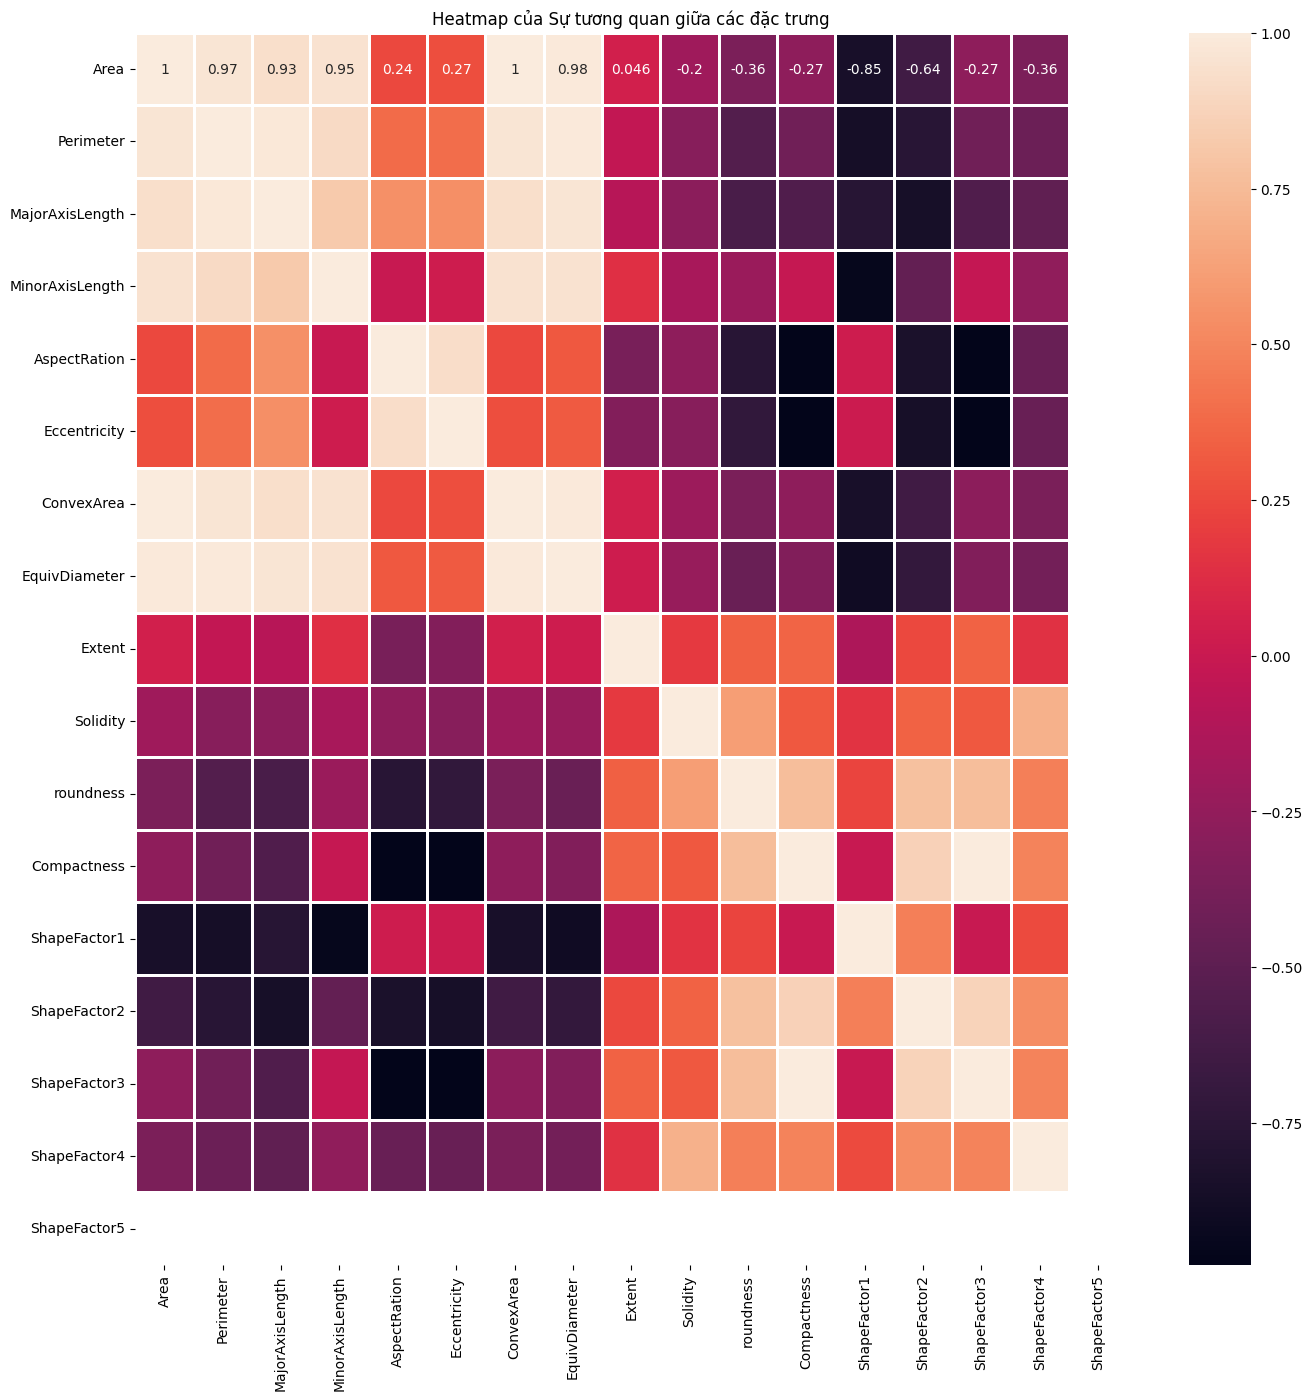

In [37]:
corr=df.corr()
plt.subplots(figsize = (16, 16))
plt.title('Heatmap của Sự tương quan giữa các đặc trưng')
hmap = sns.heatmap(corr, linewidth = 0.80, annot=True,linecolor='white',robust=True)
plt.show()

## Bar Plot 

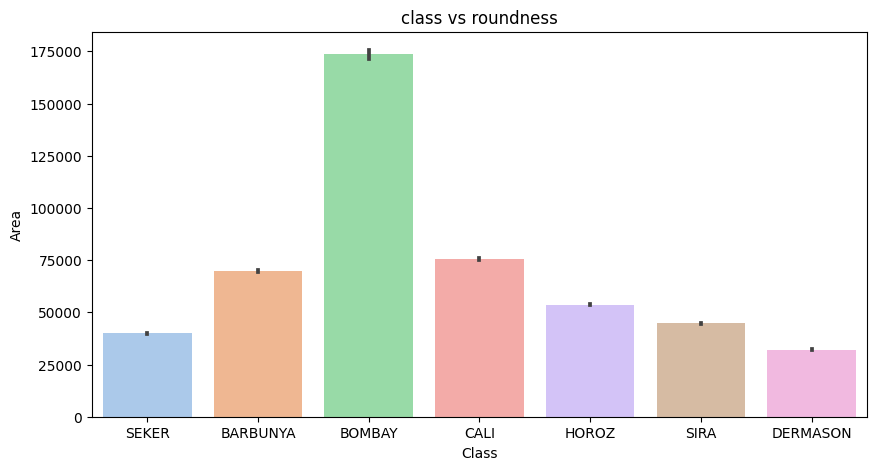

In [38]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Class', y = "Area", data = df)

plt.title('class vs roundness')
plt.show()

# Bar Plot 2

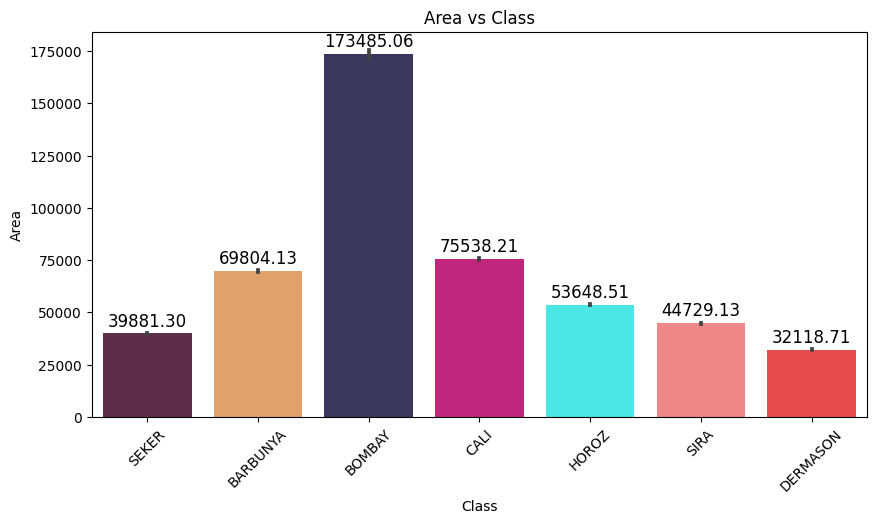

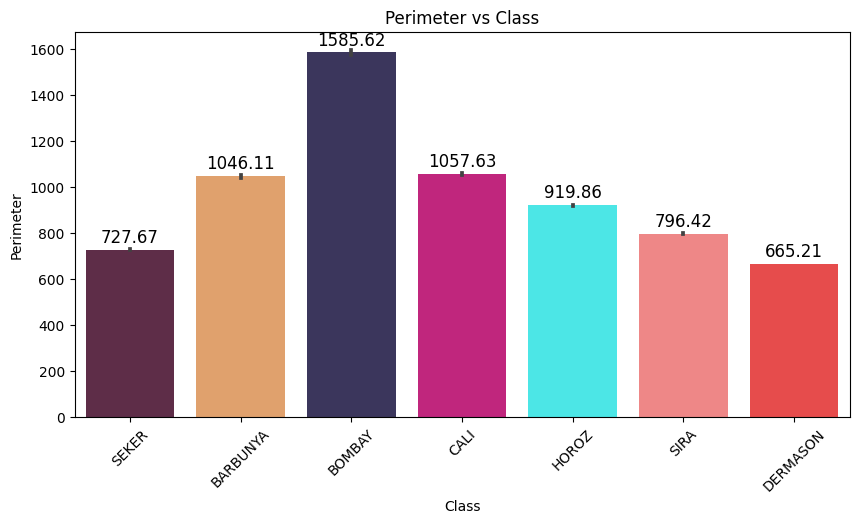

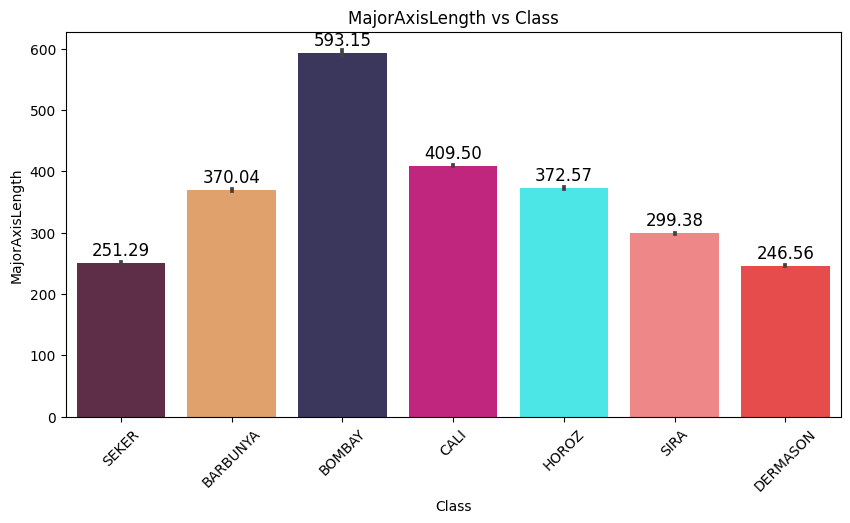

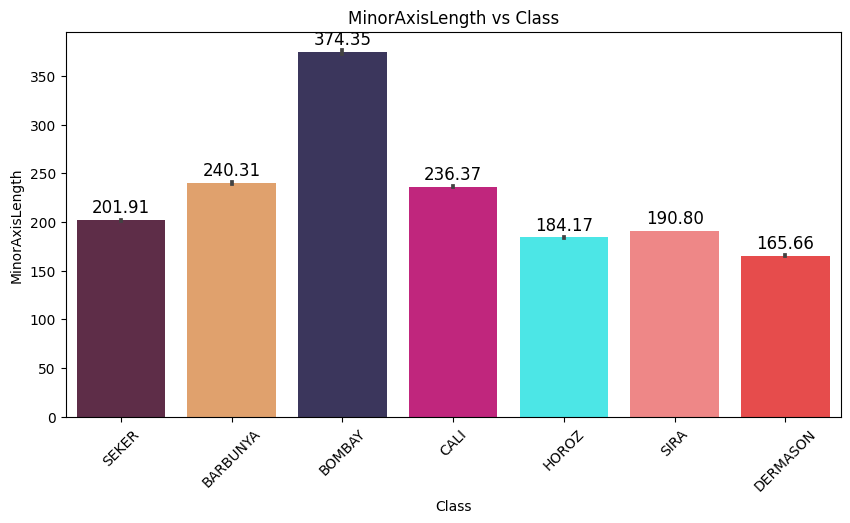

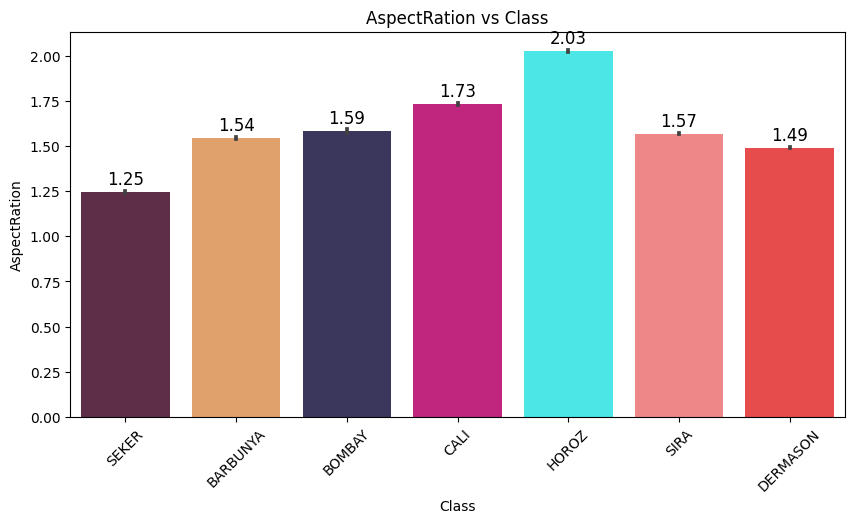

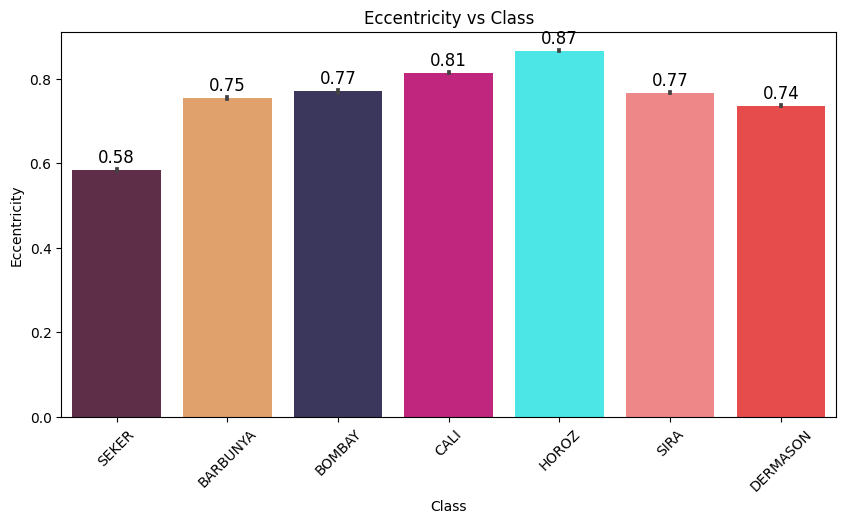

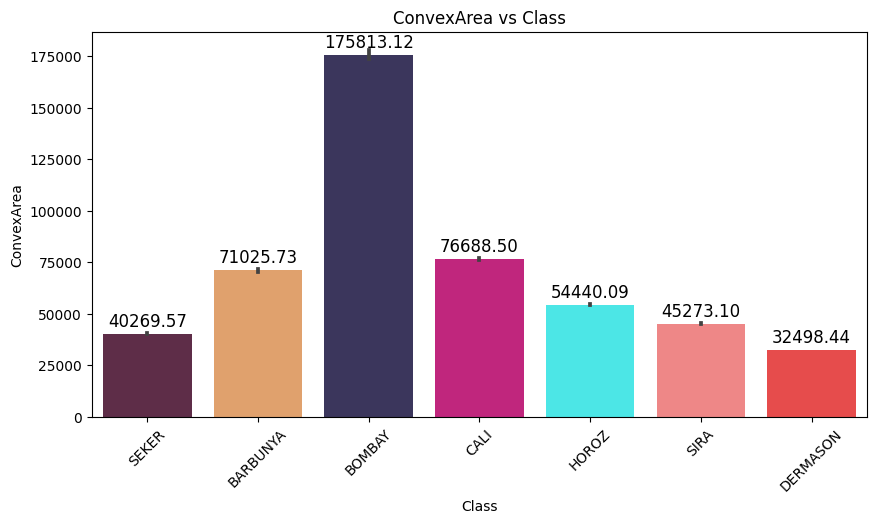

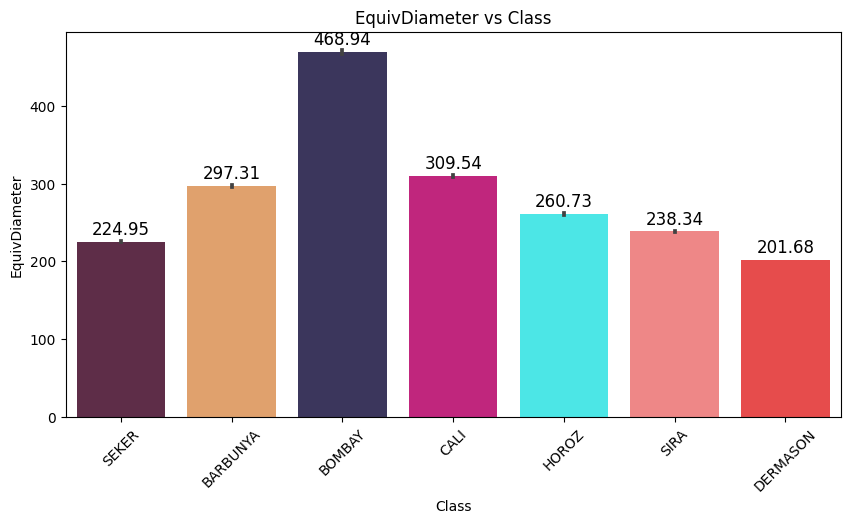

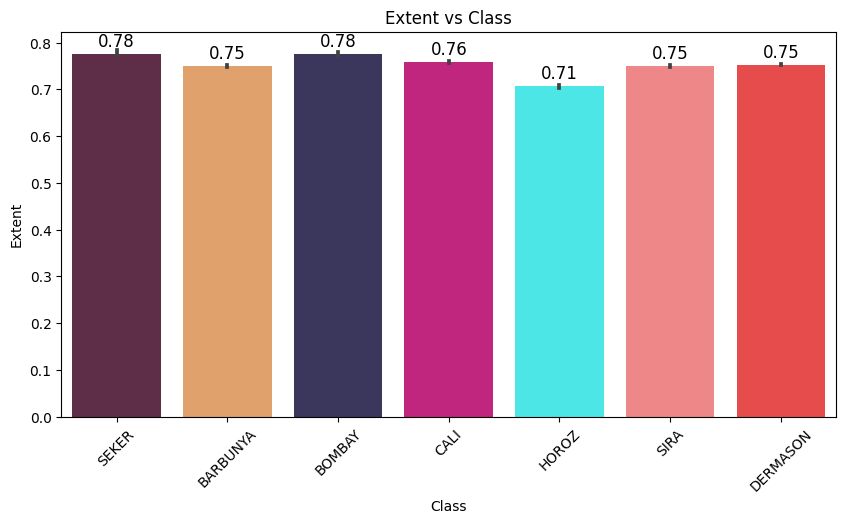

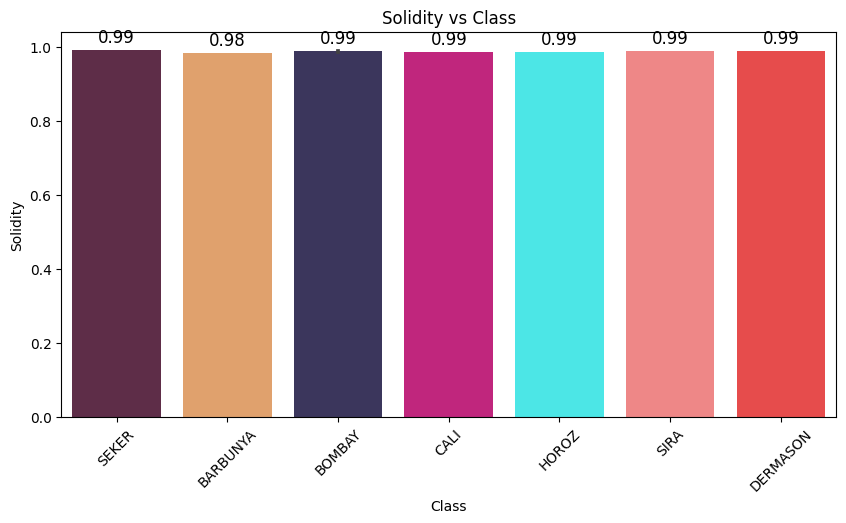

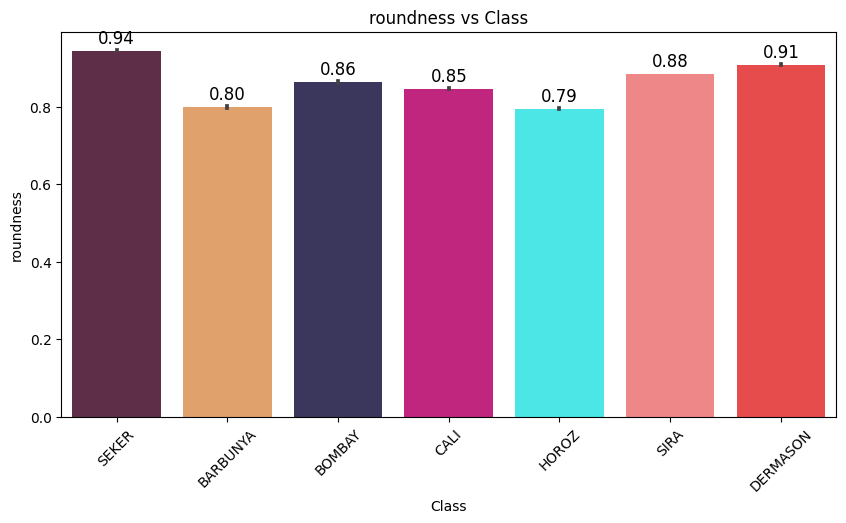

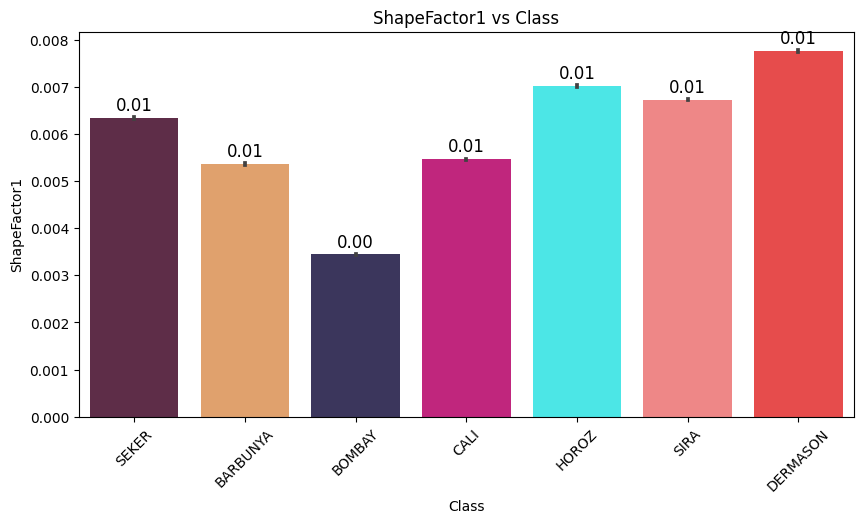

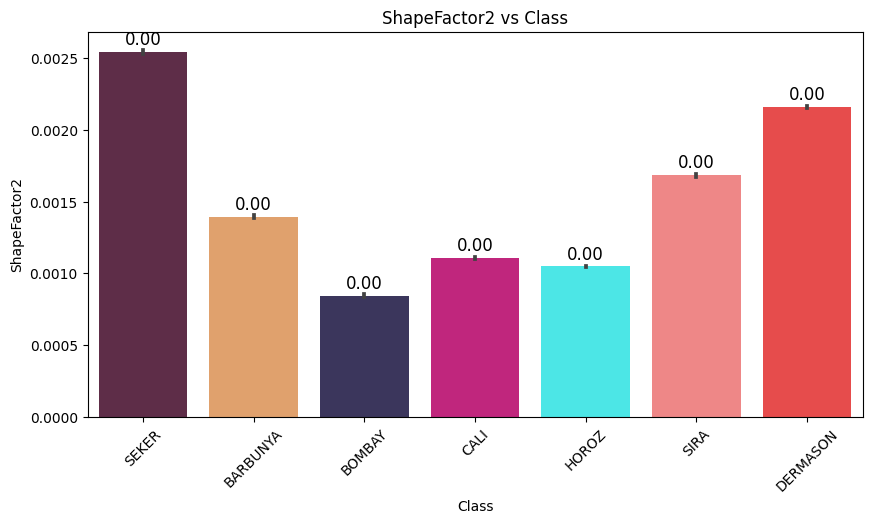

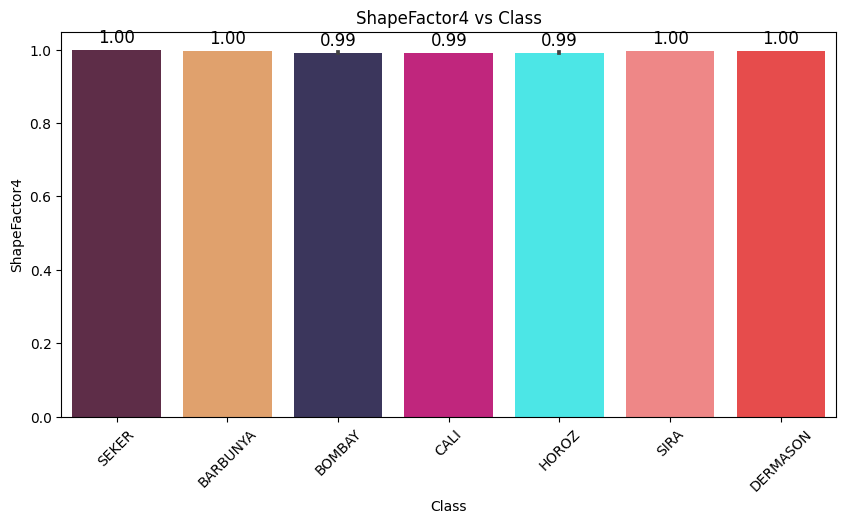

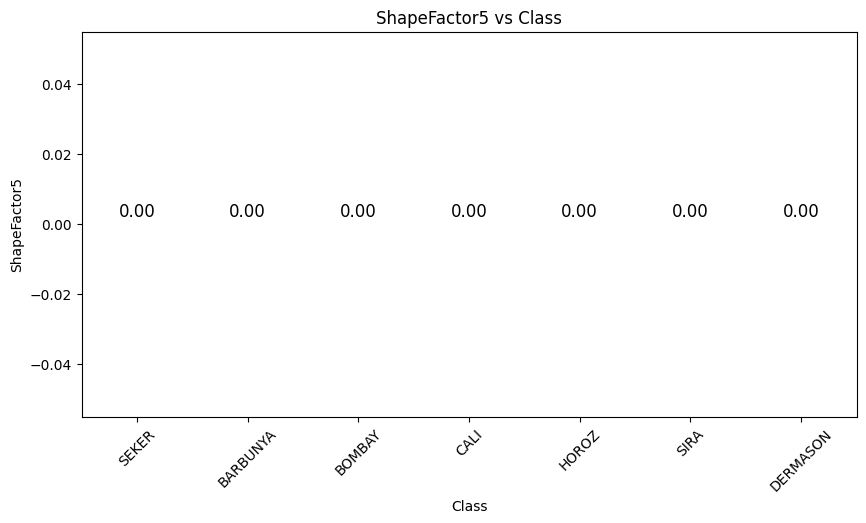

In [24]:

# Exclude non-numeric columns (like 'Class')
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Define a custom list of colors (replace these with your desired colors)
custom_colors = ['#662549', '#F39F5A', '#363062', '#DA0C81', '#33FFFF', '#FF7676', '#FF3333', '#33FF33', '#0802A3']

# Loop through numeric columns and create individual bar charts
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    
    # Create a bar chart for the current column with custom colors
    ax = sns.barplot(x='Class', y=column, data=df, palette=custom_colors)
    plt.title(f'{column} vs Class')
    plt.xticks(rotation=45)
    
    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    size=12,
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    # Show the bar chart
    plt.show()

## Scatter Plot

<Figure size 1200x1200 with 0 Axes>

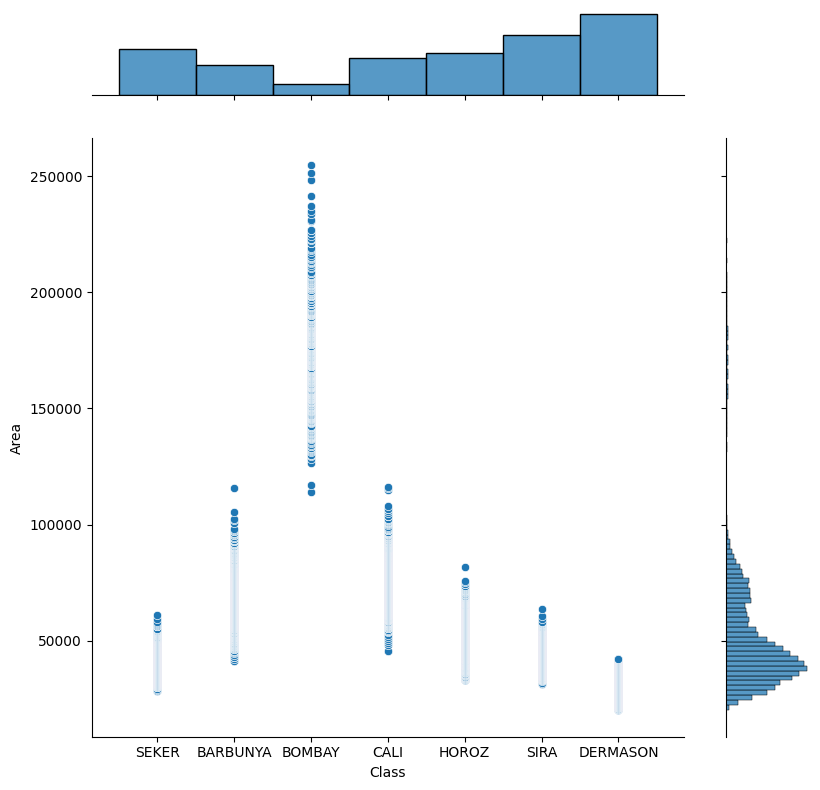

In [ ]:
plt.figure(figsize = (12, 12))
sns.jointplot(data=df, x="Class", y="Area", kind='scatter',height=8,ratio=5,space=0.5)
plt.show()

## Box Plot

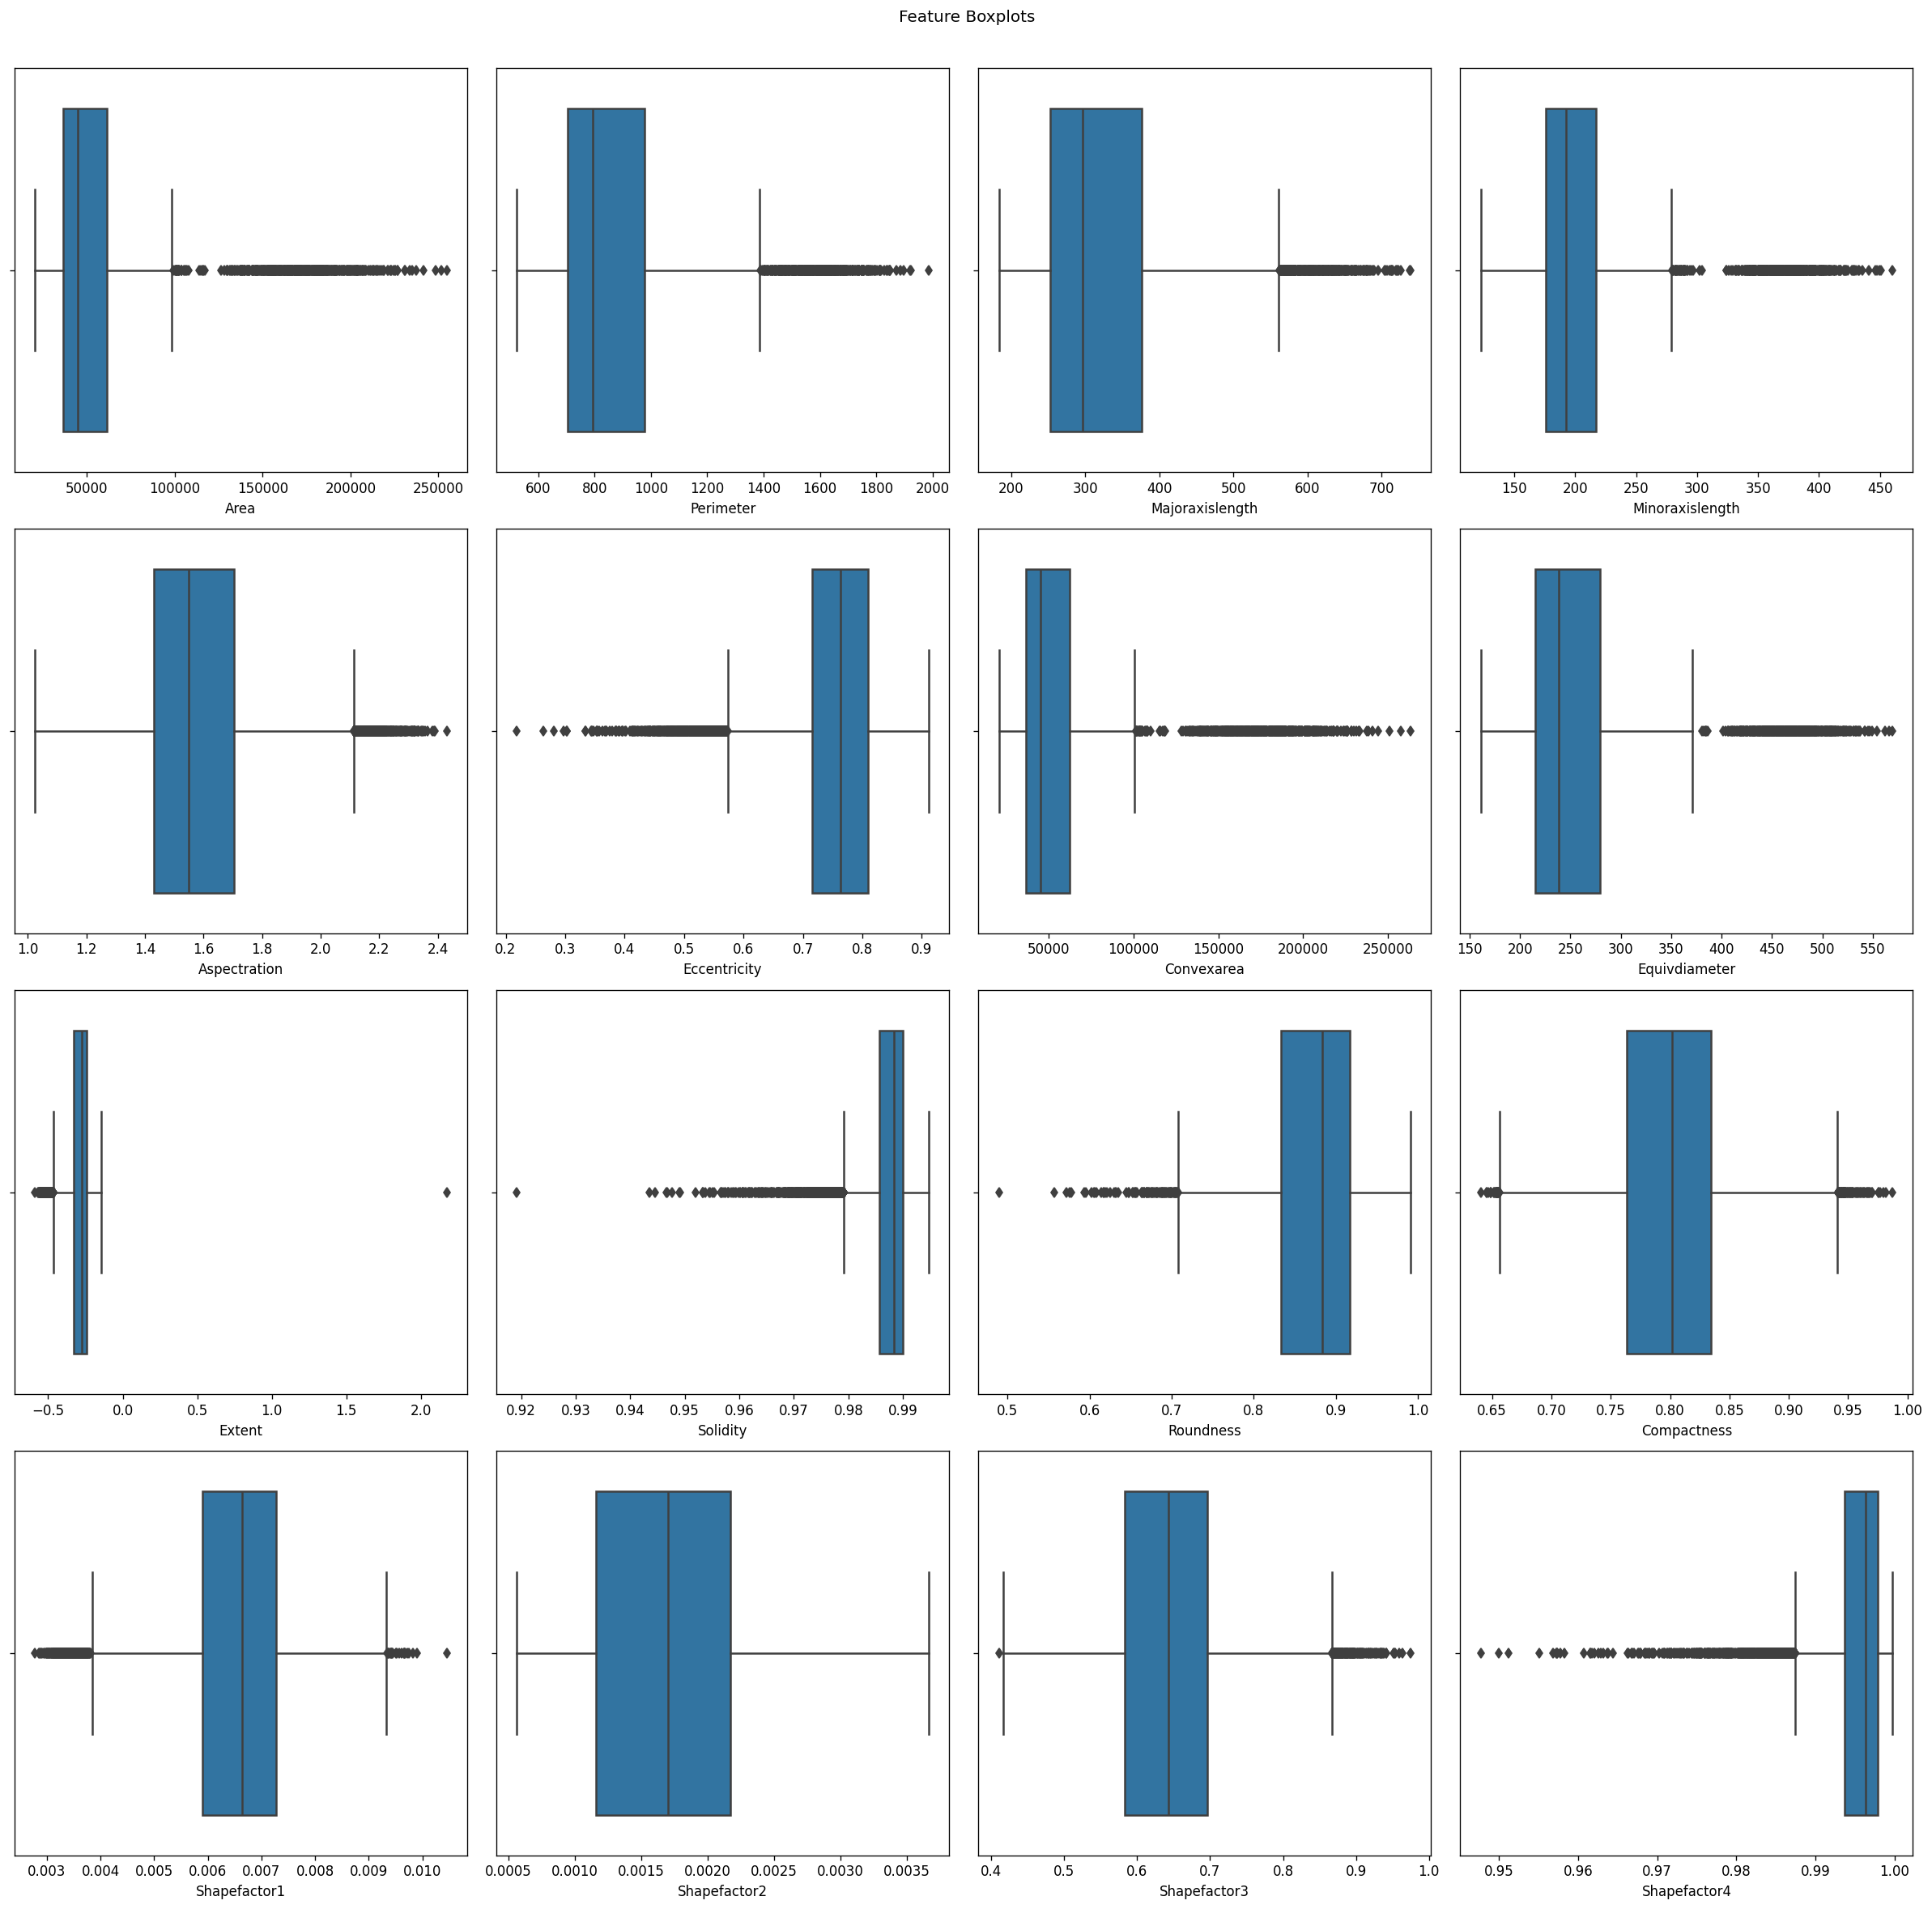

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20), dpi=120)
for i, j in zip(corr[:8], axes.flatten()):
    sns.boxplot(data=df, x=i, ax=j)
    j.set_xlabel(f"{i.title().replace('_', ' ')}")
plt.suptitle(f"Feature Boxplots")
plt.tight_layout()
plt.subplots_adjust(top=0.95);
plt.show()

# Phát Hiện Dữ liệu Ngoại lai (Outlier Detection)

Area
Skewness :  2.947


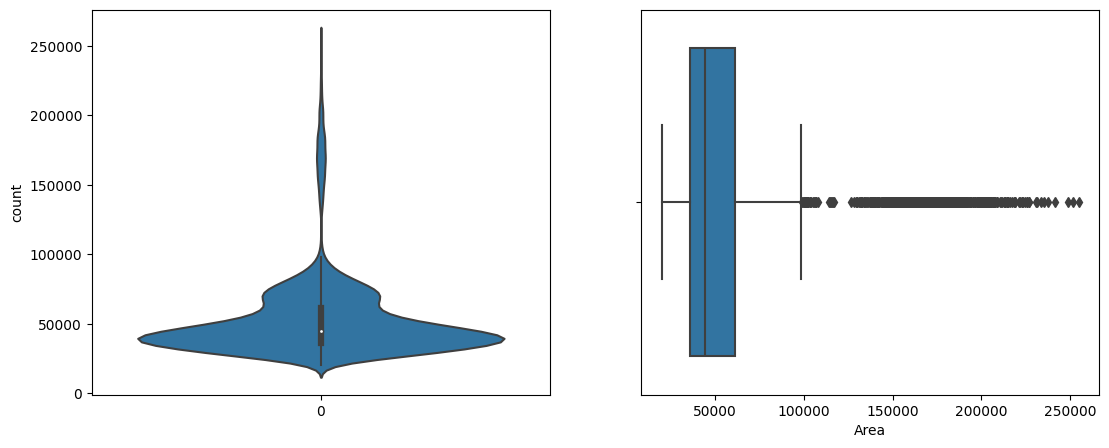

Perimeter
Skewness :  1.628


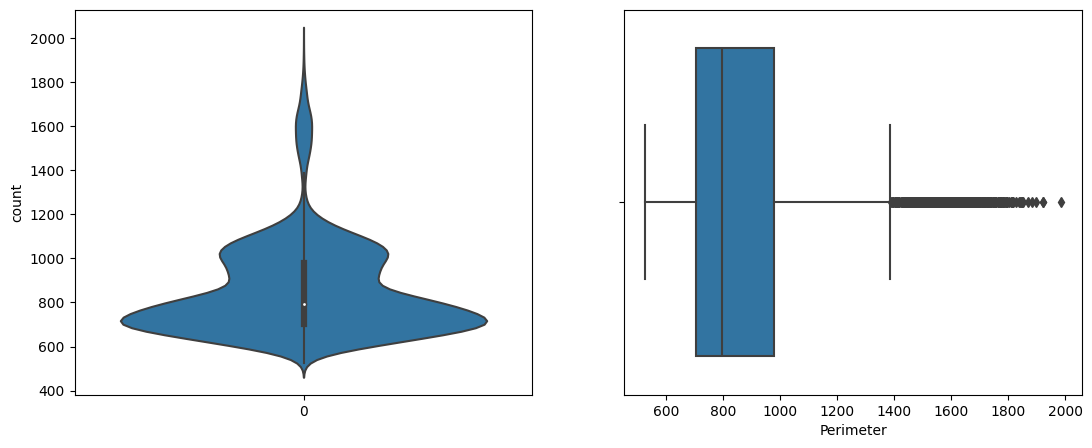

MajorAxisLength
Skewness :  1.366


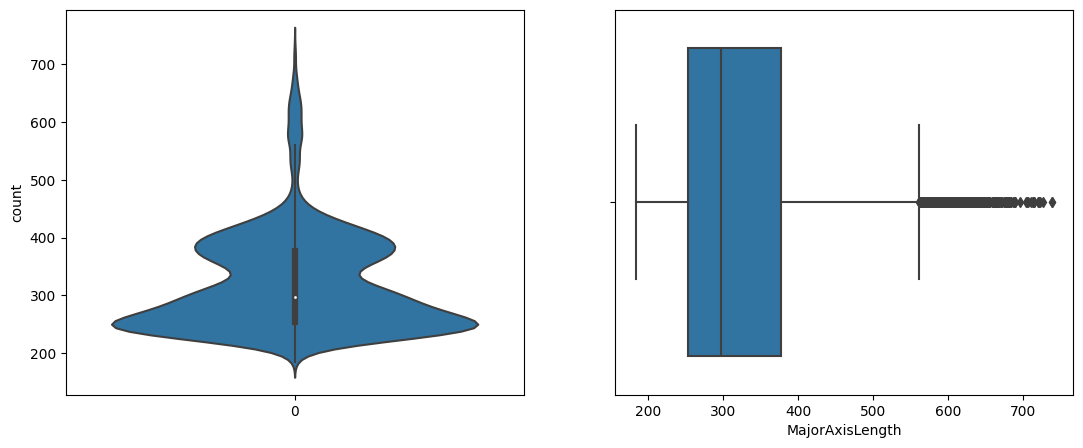

MinorAxisLength
Skewness :  2.232


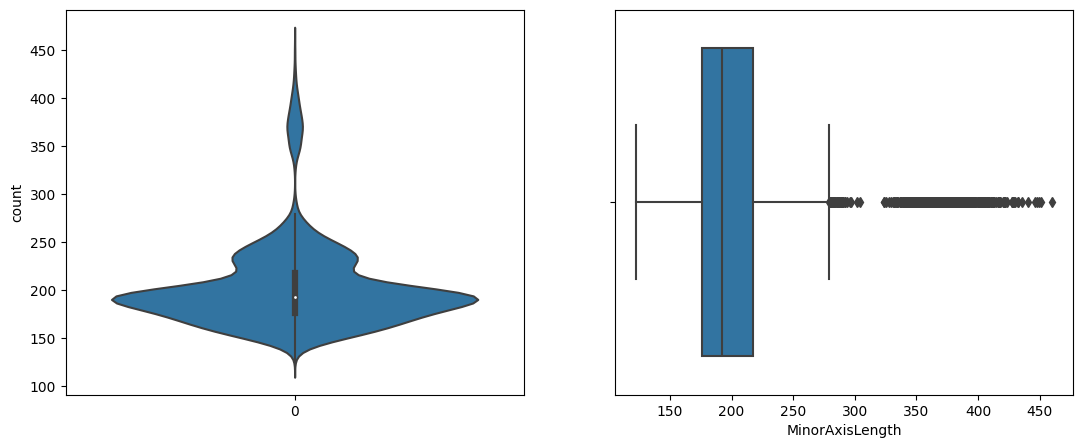

AspectRation
Skewness :  0.589


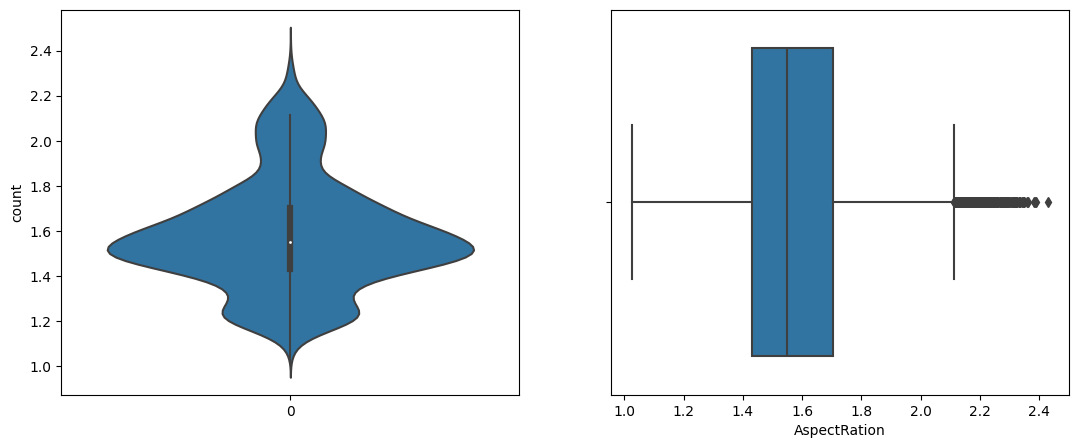

Eccentricity
Skewness :  -1.065


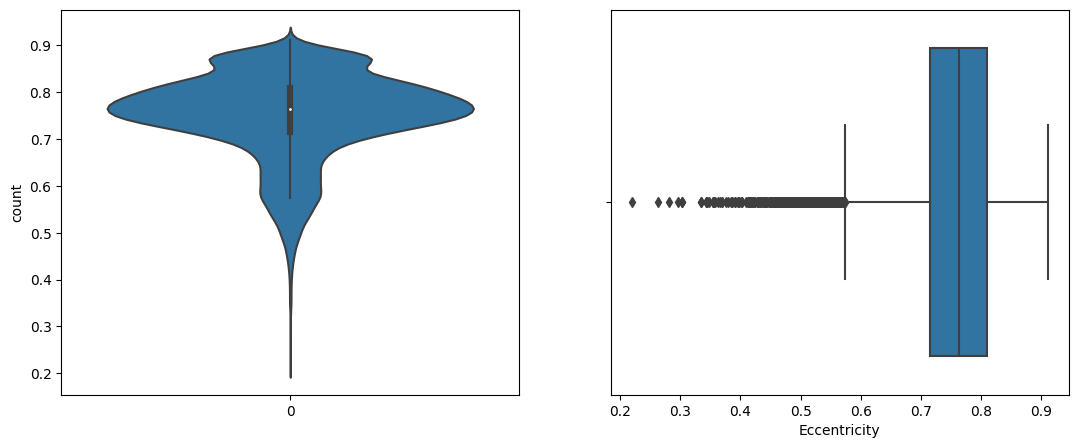

ConvexArea
Skewness :  2.936


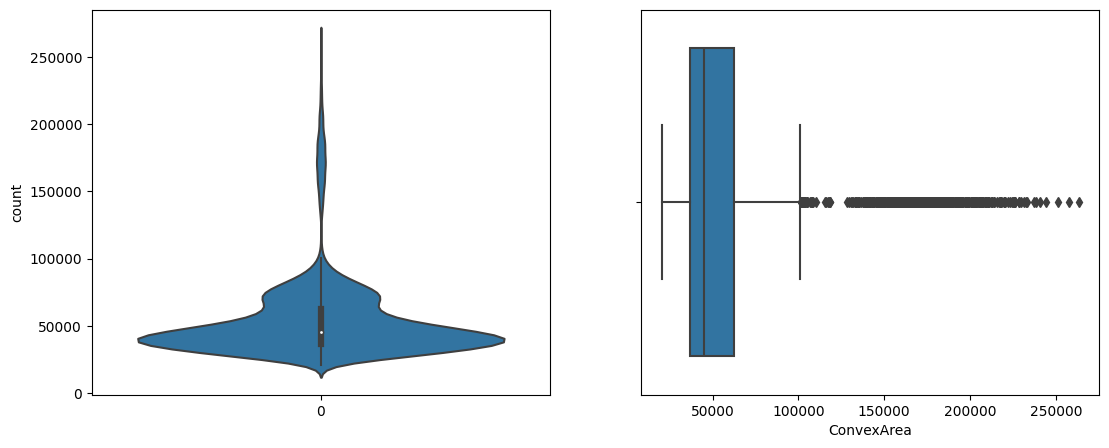

EquivDiameter
Skewness :  1.947


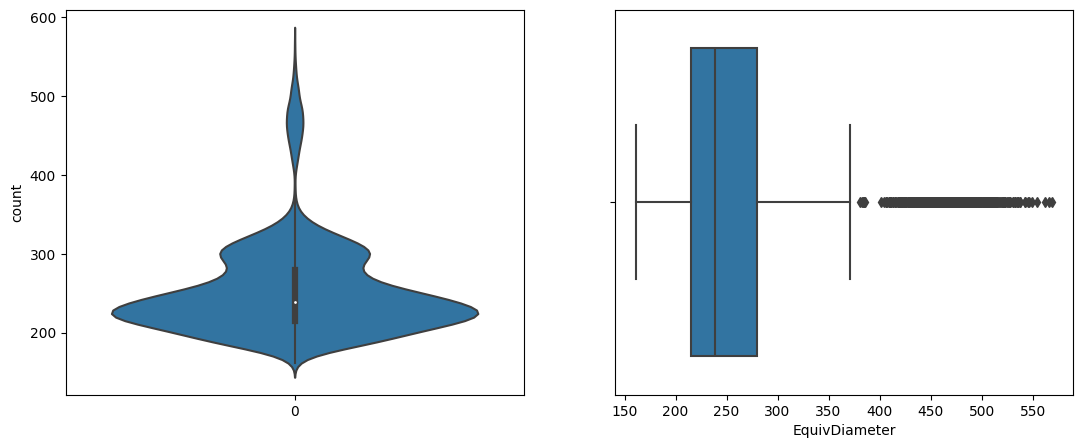

Extent
Skewness :  2.14


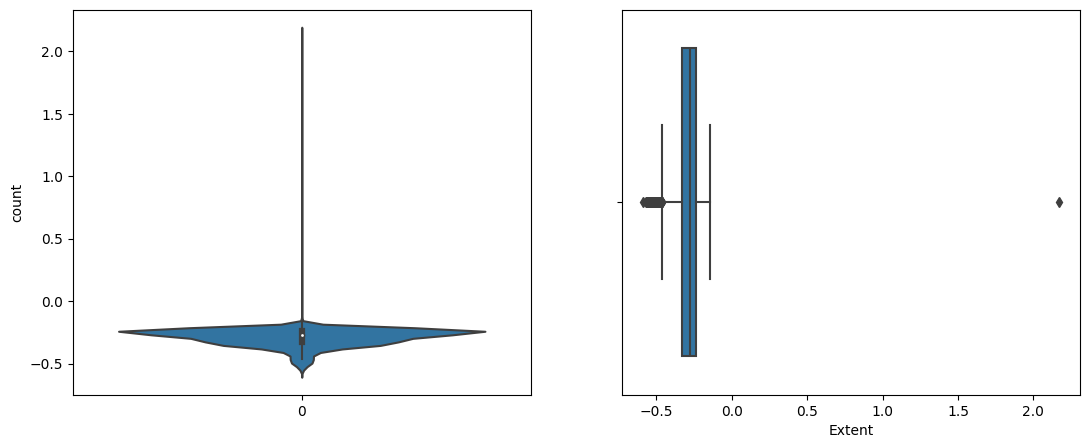

Solidity
Skewness :  -2.547


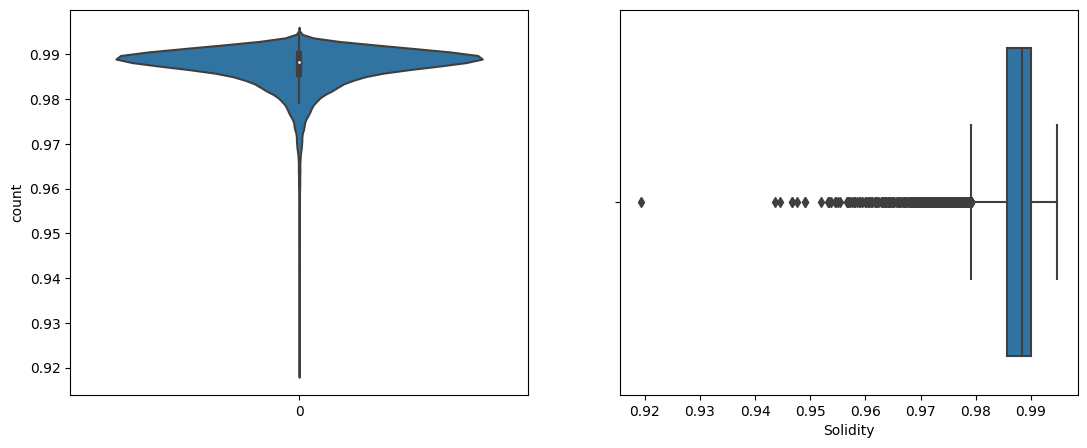

roundness
Skewness :  -0.649


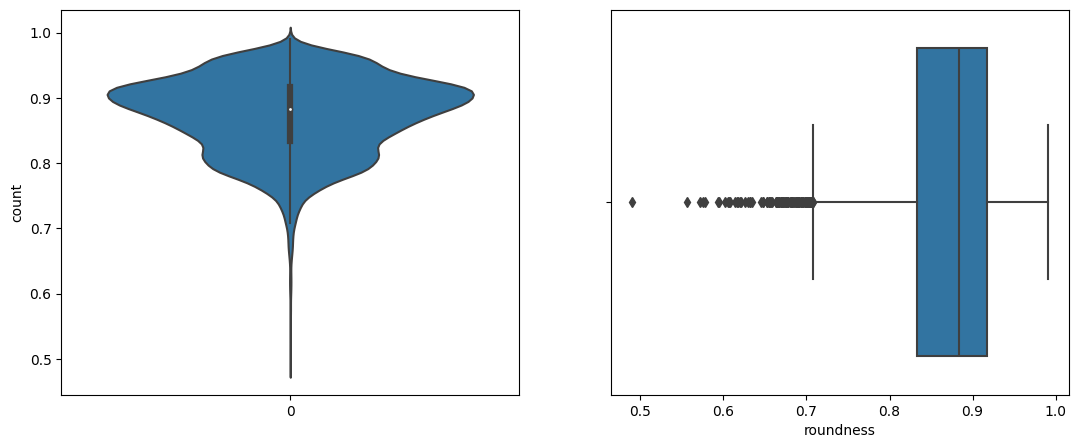

Compactness
Skewness :  0.036


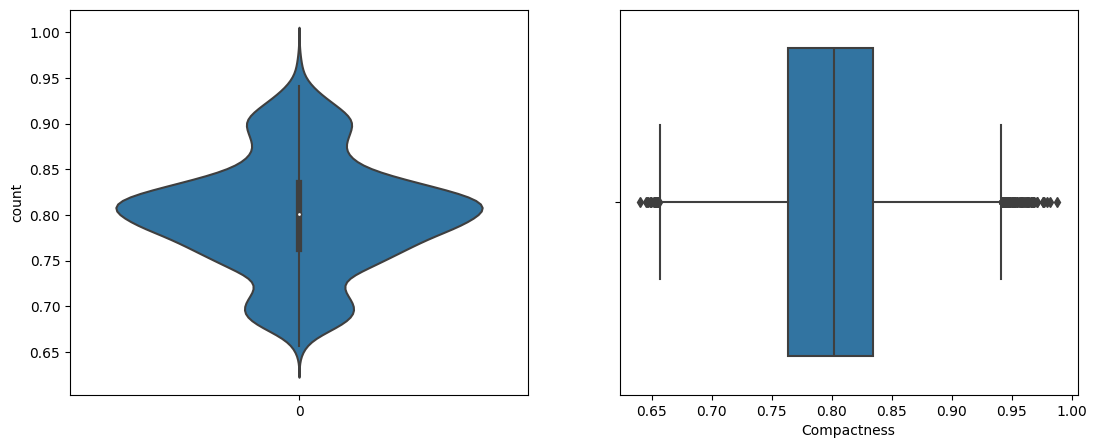

ShapeFactor1
Skewness :  -0.53


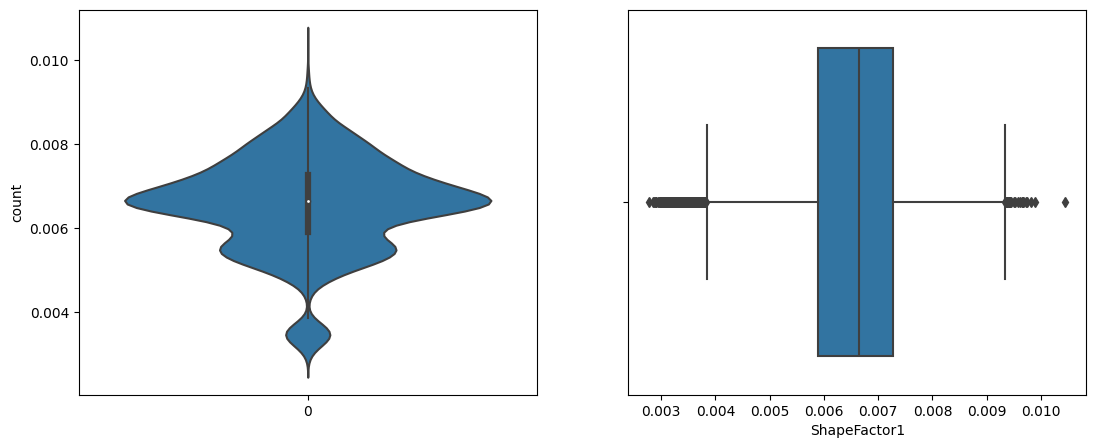

ShapeFactor2
Skewness :  0.294


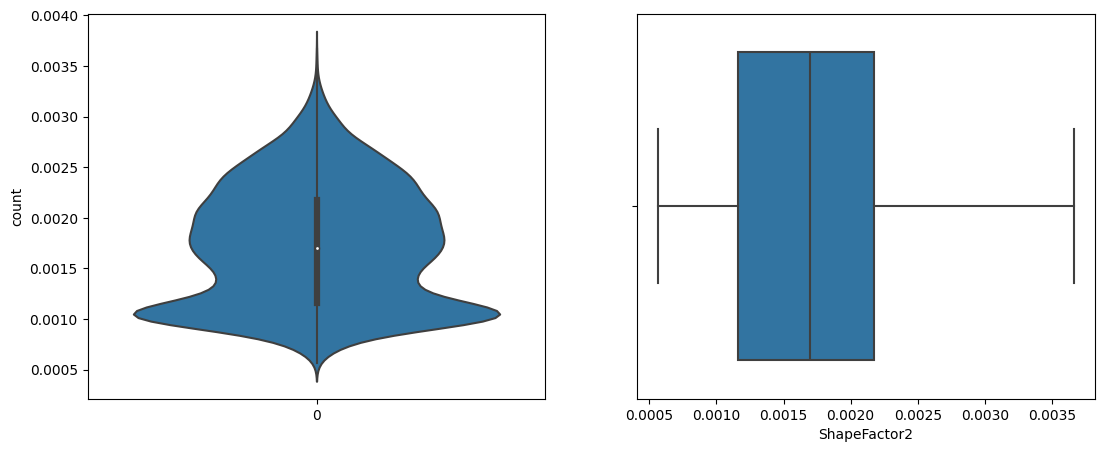

ShapeFactor3
Skewness :  0.243


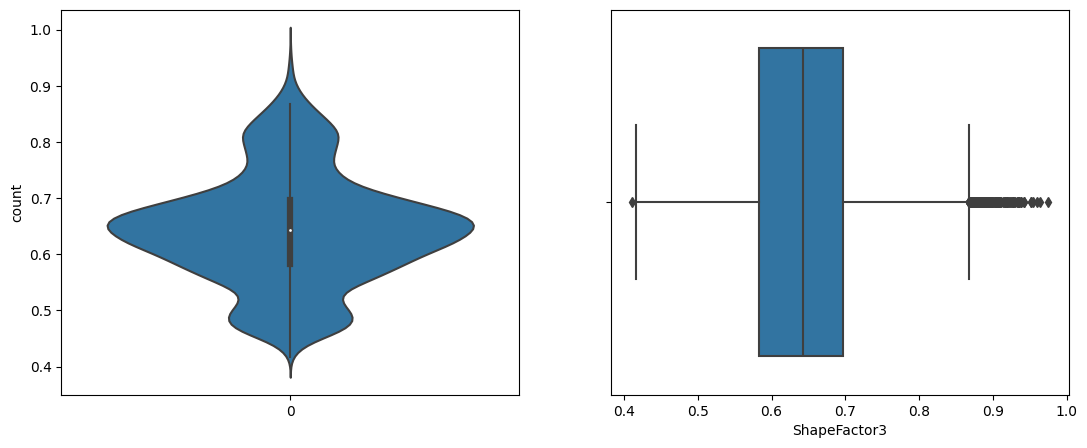

ShapeFactor4
Skewness :  -2.76


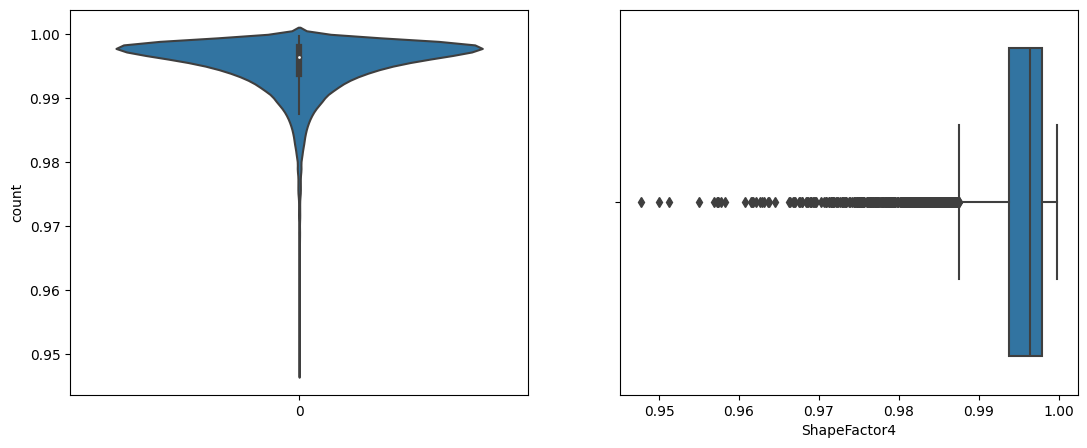

ShapeFactor5
Skewness :  0


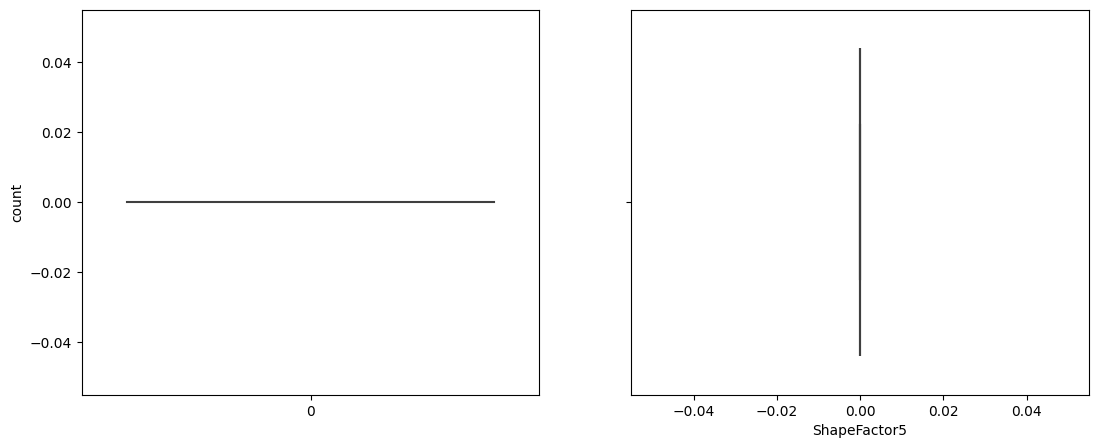

In [ ]:
# Kiểm tra các ngoại lai
for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(13,5))
        plt.subplot(1,2,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i])
        plt.show()  

# Xử lý các điểm ngoại lai (Treament of Outliers)

In [ ]:
# Tạo hàm để xử lý các ngoại lệ
def remove_outliers(df):
    for col in df.columns:
        if col != 'Class':
            q25 = np.percentile(df[col] , 25)
            q75 = np.percentile(df[col] , 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lo = q25 - cut_off
            up = q75 + cut_off
            df[col] = df[col].clip(upper = up)
            df[col] = df[col].clip(lower=lo)

In [ ]:
remove_outliers(df)

Area
Skewness :  0.962


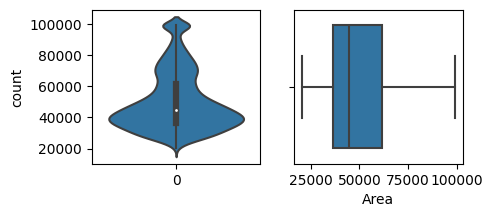

Perimeter
Skewness :  0.966


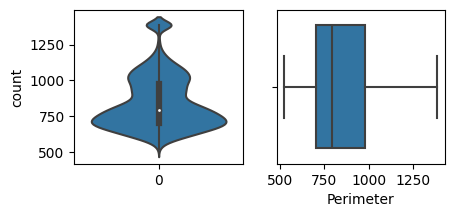

MajorAxisLength
Skewness :  0.979


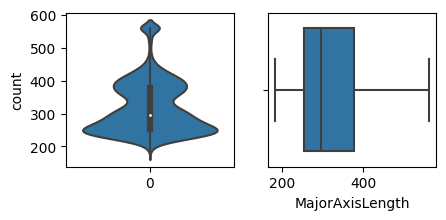

MinorAxisLength
Skewness :  0.729


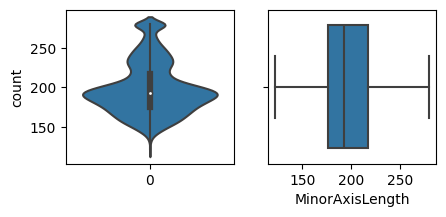

AspectRation
Skewness :  0.47


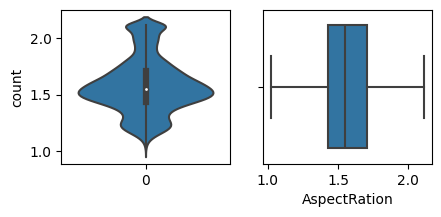

Eccentricity
Skewness :  -0.614


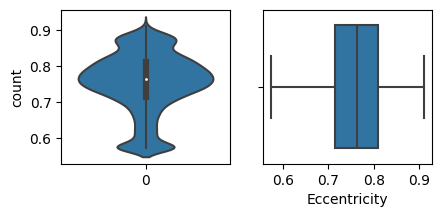

ConvexArea
Skewness :  0.969


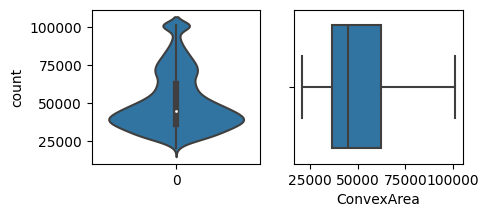

EquivDiameter
Skewness :  0.84


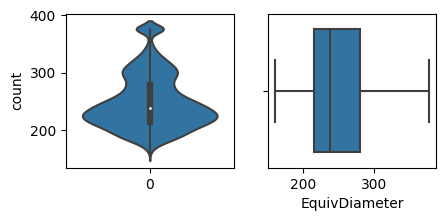

Extent
Skewness :  -0.857


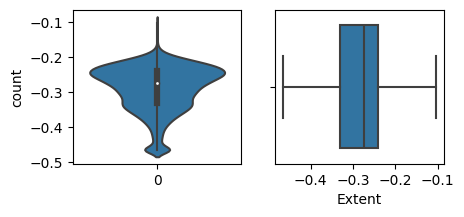

Solidity
Skewness :  -0.844


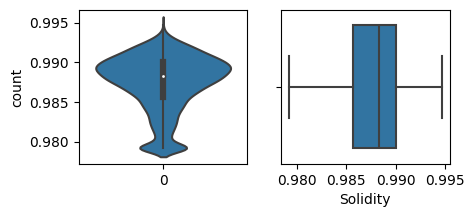

roundness
Skewness :  -0.497


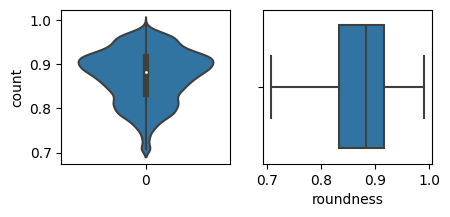

Compactness
Skewness :  0.018


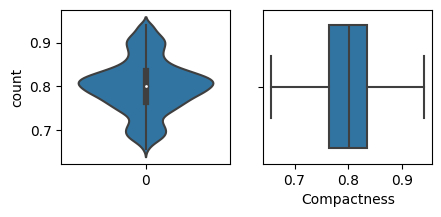

ShapeFactor1
Skewness :  -0.333


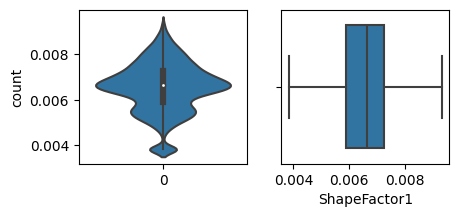

ShapeFactor2
Skewness :  0.294


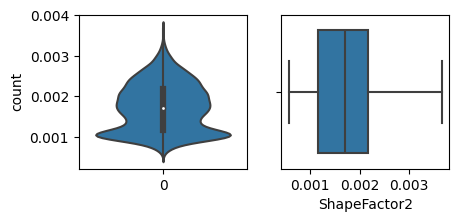

ShapeFactor3
Skewness :  0.191


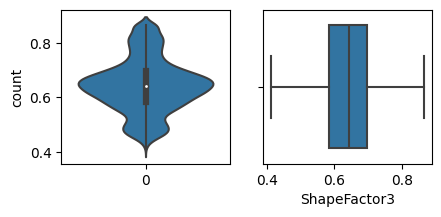

ShapeFactor4
Skewness :  -1.04


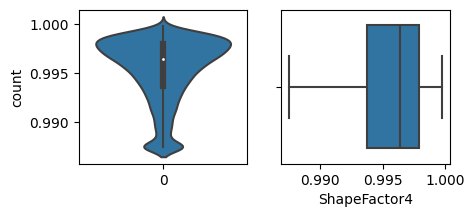

ShapeFactor5
Skewness :  0


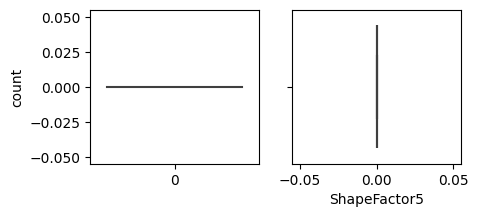

In [ ]:
# Sau khi bỏ đi các ngoại lai
for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(10,2))
        plt.subplot(1,4,1)
        sns.violinplot(df[i])
        plt.ylabel('count')
        plt.subplot(1,4,2)
        sns.boxplot(x=df[i])
        plt.show() 

# Kiểm Tra Sự Mất Cân Bằng của Dữ liệu

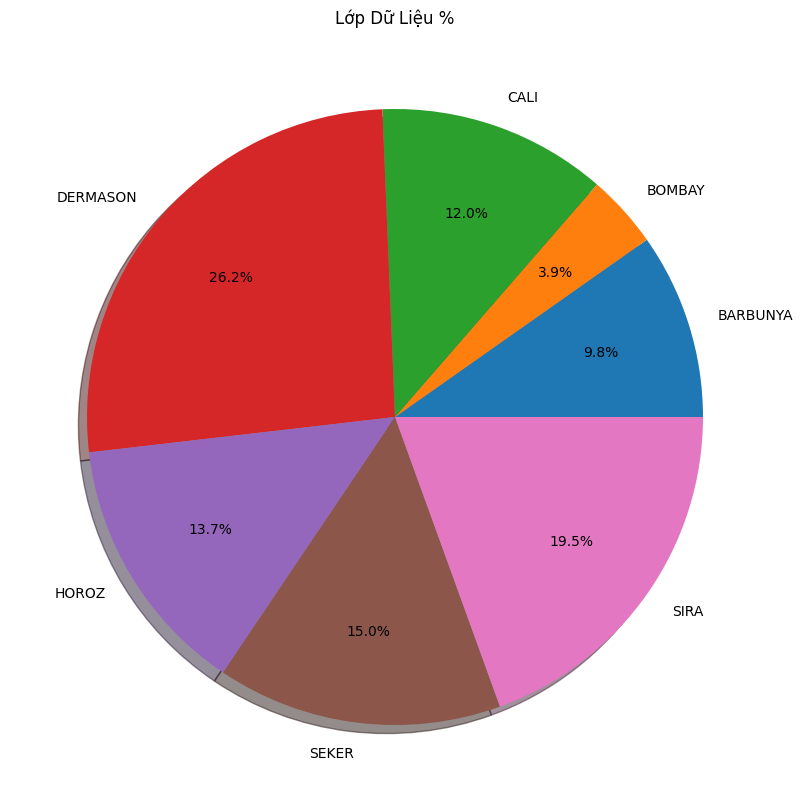

In [ ]:
labels, counts = np.unique(df.Class, return_counts=True)
plt.figure(figsize = (10,10))
plt.pie(counts, autopct='%1.1f%%', labels=labels, pctdistance=0.7,shadow=True,counterclock=True,normalize=True,)
plt.title('Lớp Dữ Liệu %')
plt.show()

# Cân Bằng Dữ liệu (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

## Xác Định Biến Mục tiêu

In [ ]:
X = df.drop('Class', axis=1)
y = df.Class

In [ ]:
X_smote, y_smote = smote.fit_resample(X, y)

## Kiểm Tra Dữ Liệu Mới

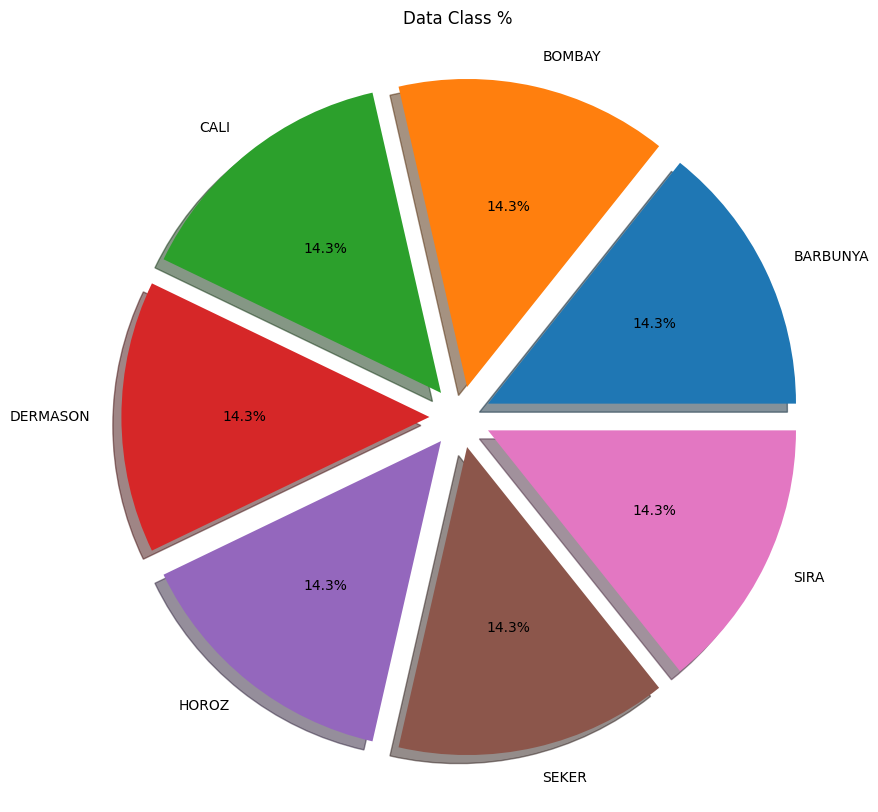

In [ ]:
labels, counts = np.unique(y_smote, return_counts=True)
myexplode=[0.10,0.10,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels,explode = myexplode,shadow=True)

plt.title('Data Class % ')
plt.show()

# Làm Sạch Dữ Liệu

## Chuyển hoá dữ liệu 

In [ ]:
list(np.unique(y_smote))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [ ]:
y_smote.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [i for i in range(len(np.unique(y_smote)))])

0        5
1        5
2        5
3        5
4        5
        ..
24817    6
24818    6
24819    6
24820    6
24821    6
Name: Class, Length: 24822, dtype: int64

# Loại Bỏ Các Đặc điểm/Cột Có Mối Tương Quan Cao

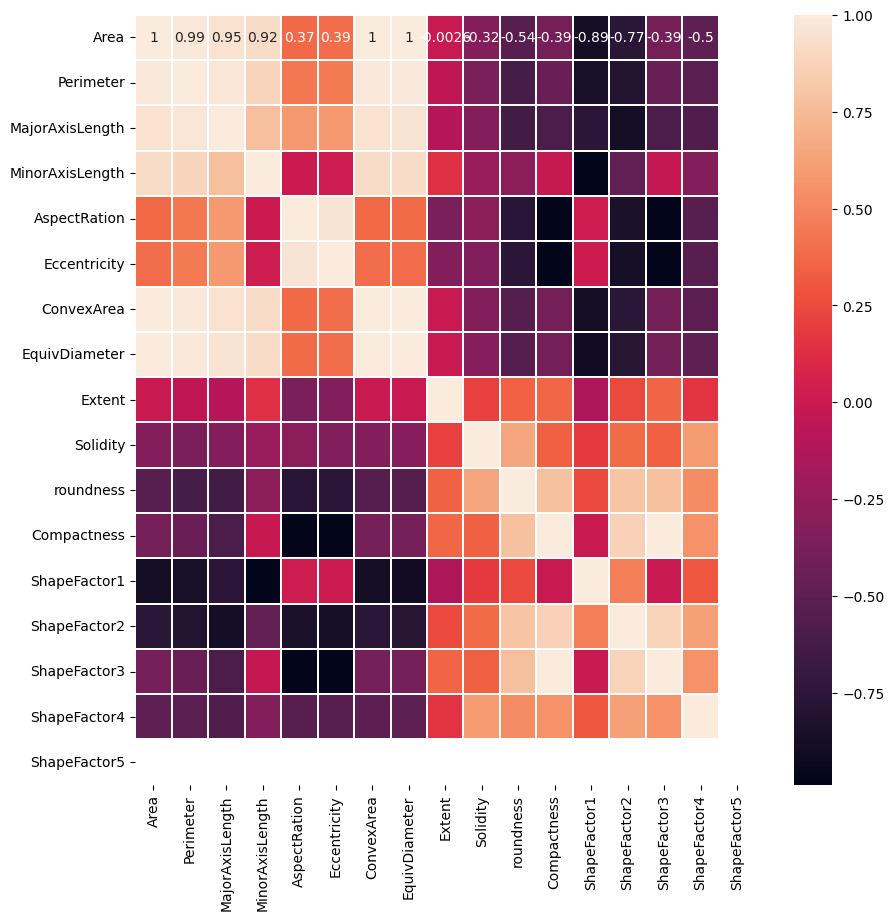

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True,linewidth = 0.20,robust=True)
plt.show()

### Dựa vào HeatMap này, chúng ta có thể nói rằng Convex Area có Mối quan hệ Thuận với Area, Perimeter, MajorAxisLength, MinorAxisLength và EquivDiameter, cũng như Shape 3 có Mối quan hệ Thuận với Eccentricity

## Loại Bỏ Những Đặc trưng Không Bình Thương

In [ ]:
X_smote.drop(['ConvexArea', 'EquivDiameter','ShapeFactor3', 'Extent',  'ShapeFactor5'], axis=1, inplace=True)

In [ ]:
X_smote.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,28395.00,610.29,208.18,173.89,1.20,0.57,0.99,0.96,0.91,0.01,0.00,1.00
1,28734.00,638.02,200.52,182.73,1.10,0.57,0.98,0.89,0.94,0.01,0.00,1.00
2,29380.00,624.11,212.83,175.93,1.21,0.57,0.99,0.95,0.91,0.01,0.00,1.00
3,30008.00,645.88,210.56,182.52,1.15,0.57,0.98,0.90,0.93,0.01,0.00,0.99
4,30140.00,620.13,201.85,190.28,1.06,0.57,0.99,0.98,0.94,0.01,0.00,1.00


# Train Test And Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=42, shuffle=True, test_size=0.27)

### Sử dụng Standard Scaler để chuẩn hoá dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

array([[-0.63129555, -0.40636467, -0.0256284 , ...,  1.45383202,
        -0.86650492,  0.56587589],
       [-1.19720727, -1.13170831, -1.15469467, ...,  1.12673688,
         1.26318042,  0.46521141],
       [-0.6824093 , -0.68185232, -0.64308056, ...,  0.48369639,
         0.35222807,  0.69644484],
       ...,
       [ 0.22148337,  0.03778409, -0.05537968, ..., -0.46876516,
        -0.10196426,  0.72649143],
       [ 0.03395614,  0.06876152, -0.08046763, ..., -0.19481078,
        -0.21009583,  0.81069674],
       [-0.91330201, -0.92338955, -0.9127008 , ...,  0.63991268,
         0.87343332,  0.45272456]])

# Kiểm Tra Mô hình Nào Sẽ Tốt Hơn

In [ ]:
from lazypredict.Supervised import LazyClassifier
# Tạo đối tượng LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [ ]:
# Đưa mô hình vào dữ liệu huấn luyện
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
# print(models)

### Có thể tìm thấy các thuật toán khác nhau cùng với độ chính xác và điểm F1 của chúng, cũng như thời gian mất để thực hiện. Hãy thử một trong những thuật toán này có độ chính xác tốt nhất.

## Decision Tree Classifier

### Sử dụng nghi thức HOLD_OUT (random 2/3 học, 1/3 test)

Nghi thức kiểm tra HOLD_OUT

Lần lặp  1  Độ chính xác = 92.42
Lần lặp  2  Độ chính xác = 93.05


Lần lặp  3  Độ chính xác = 93.87
Lần lặp  4  Độ chính xác = 93.75
Lần lặp  5  Độ chính xác = 93.75
Lần lặp  6  Độ chính xác = 93.7
Lần lặp  7  Độ chính xác = 93.64
Lần lặp  8  Độ chính xác = 93.52
Lần lặp  9  Độ chính xác = 93.42
Lần lặp  10  Độ chính xác = 93.54


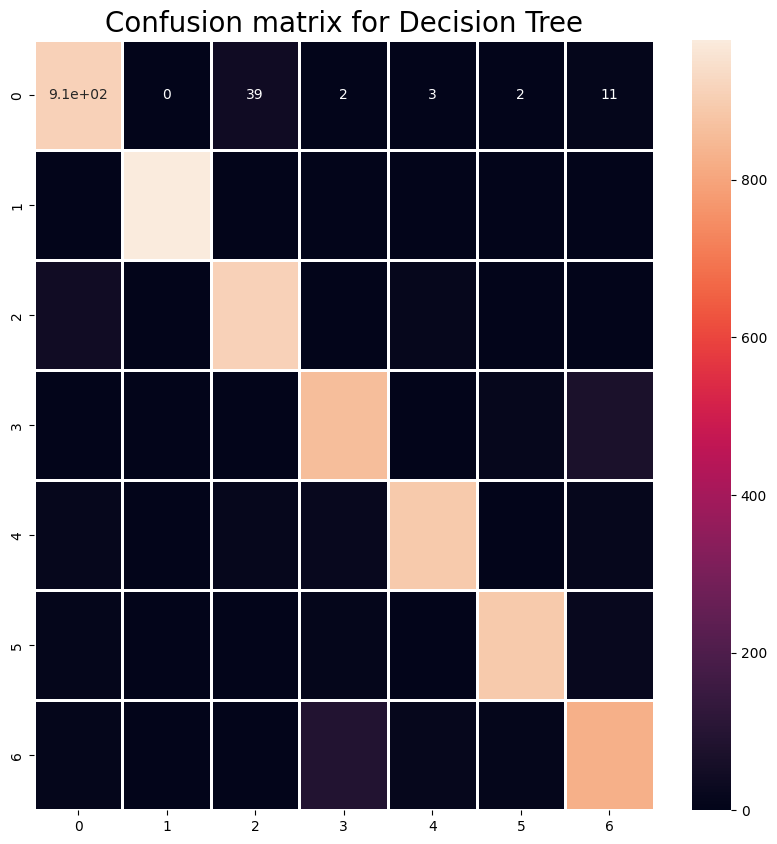

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

print("Nghi thức kiểm tra HOLD_OUT\n")
max = 0;
max_index = 0;
for i in range(1, 11):
	Tree = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=i+5, min_samples_leaf=i+1)
	Tree.fit(X_train, y_train)
	y_pred = Tree.predict(X_test)
	acc = accuracy_score(y_test, y_pred)
	if (max <= acc):
		max = acc
		max_index = i
	print ("Lần lặp ", i, " Độ chính xác =", round(acc*100, 2))
 
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,linewidths=1,linecolor='white',cbar=True)
plt.title("Confusion matrix for Decision Tree",fontsize=20)
plt.show()

## Sử dụng joblib để lưu trữ model

In [ ]:
import joblib

joblib.dump(Tree, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [ ]:
X_smote.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,28395.00,610.29,208.18,173.89,1.20,0.57,0.99,0.96,0.91,0.01,0.00,1.00
1,28734.00,638.02,200.52,182.73,1.10,0.57,0.98,0.89,0.94,0.01,0.00,1.00
2,29380.00,624.11,212.83,175.93,1.21,0.57,0.99,0.95,0.91,0.01,0.00,1.00
3,30008.00,645.88,210.56,182.52,1.15,0.57,0.98,0.90,0.93,0.01,0.00,0.99
4,30140.00,620.13,201.85,190.28,1.06,0.57,0.99,0.98,0.94,0.01,0.00,1.00


In [ ]:
# Quá trình mô hình sử dụng để dự đoán
new_check = Tree.predict((np.array([[164719,1536.30,572.91,369.54,1.55,0.76,0.99,0.87,0.79,0.00,0.00,0.99]])))
print("Dự đoán : ",new_check)

Dự đoán :  ['BOMBAY']


In [ ]:
# Quá trình mô hình sử dụng để dự đoán
new_check = Tree.predict((np.array([[34911,677.46,235.25,189.27,1.24,0.59,0.99,0.95,0.89,0.00,0.80,0.99]])))
print("Dự đoán : ",new_check)

Dự đoán :  ['SEKER']


In [ ]:
# Báo cáo phân loại (classification report)
from sklearn.metrics import classification_report
cr =classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.94      0.93       968
      BOMBAY       1.00      1.00      1.00       977
        CALI       0.94      0.93      0.94       973
    DERMASON       0.88      0.91      0.89       944
       HOROZ       0.97      0.94      0.95       952
       SEKER       0.97      0.96      0.96       935
        SIRA       0.88      0.87      0.87       953

    accuracy                           0.94      6702
   macro avg       0.94      0.94      0.94      6702
weighted avg       0.94      0.94      0.94      6702



# So Sánh các Mô Hình Máy Học

### Sử dụng nghi thực K_FOLD (Chia dữ liệu thành k phần bằng nhau)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

kf = KFold(n_splits=10, shuffle = True)

print("\nNghi Thức Kiểm Tra K_FOLD\n")

KNN = KNeighborsClassifier(n_neighbors = 10)

Bayes = GaussianNB()

Treee = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=max_index, min_samples_leaf=max_index)

total_acc_tree = 0
total_acc_knn = 0
total_acc_bayes = 0
arrTree = []
arrKNN = []
arrBayes = []

i=1

for train_index, test_index in kf.split(X):
	#-------------Split Data--------------
	X_train, X_test = X_smote.iloc[train_index], X_smote.iloc[test_index]
	y_train, y_test = y_smote.iloc[train_index], y_smote.iloc[test_index]
 
	print("=============================")
	print("\nLần lặp thứ", i, "")
	i = i + 1

	#--------DecisionTree----------
	Treee.fit(X_train, y_train)
	y_pred_tree = Treee.predict(X_test)
	acc_tree = accuracy_score(y_test, y_pred_tree) * 100
	total_acc_tree += acc_tree

	#-------------KNN--------------
	KNN.fit(X_train, y_train)
	y_pred_knn = KNN.predict(X_test)
	acc_knn = accuracy_score(y_test, y_pred_knn) * 100
	total_acc_knn += acc_knn

	#------------Bayes-------------
	Bayes.fit(X_train, y_train)
	y_pred_bayes = Bayes.predict(X_test)
	acc_bayes = accuracy_score(y_test, y_pred_bayes) * 100
	total_acc_bayes += acc_bayes

	arrTree.append(round(acc_tree, 2))
	arrKNN.append(round(acc_knn, 2))
	arrBayes.append(round(acc_bayes, 2))

	print("Độ chính xác Tree: ", round(acc_tree, 2), "%", "\nĐộ chính xác KNN: ", round(acc_knn, 2), "%", "\nĐộ chính xác Bayes: ", round(acc_bayes, 2), "%\n")

print("Tree", arrTree)
print("KNN", arrKNN)
print("Bayes", arrBayes)

print("\nĐộ chính xác TB:\nTree : ", round(float(total_acc_tree/10), 2), "%\nKNN : ", round(total_acc_knn/10, 2), "%\nBayes : ", round(total_acc_bayes/10, 2), "%")



Nghi Thức Kiểm Tra K_FOLD


Lần lặp thứ 1 
Độ chính xác Tree:  80.96 % 
Độ chính xác KNN:  80.07 % 
Độ chính xác Bayes:  83.47 %


Lần lặp thứ 2 
Độ chính xác Tree:  79.04 % 
Độ chính xác KNN:  78.15 % 
Độ chính xác Bayes:  80.66 %


Lần lặp thứ 3 
Độ chính xác Tree:  79.26 % 
Độ chính xác KNN:  78.6 % 
Độ chính xác Bayes:  80.07 %


Lần lặp thứ 4 
Độ chính xác Tree:  80.5 % 
Độ chính xác KNN:  79.62 % 
Độ chính xác Bayes:  83.16 %


Lần lặp thứ 5 
Độ chính xác Tree:  80.58 % 
Độ chính xác KNN:  78.88 % 
Độ chính xác Bayes:  82.42 %


Lần lặp thứ 6 
Độ chính xác Tree:  81.98 % 
Độ chính xác KNN:  79.32 % 
Độ chính xác Bayes:  80.8 %


Lần lặp thứ 7 
Độ chính xác Tree:  79.25 % 
Độ chính xác KNN:  77.99 % 
Độ chính xác Bayes:  79.84 %


Lần lặp thứ 8 
Độ chính xác Tree:  80.87 % 
Độ chính xác KNN:  76.0 % 
Độ chính xác Bayes:  79.32 %


Lần lặp thứ 9 
Độ chính xác Tree:  79.84 % 
Độ chính xác KNN:  79.17 % 
Độ chính xác Bayes:  82.13 %


Lần lặp thứ 10 
Độ chính xác Tree:  80.65 % 
Độ 

### Xây dụng đánh giá với các chỉ số khác nhau như Accuracy, recall, precision, F1

     Classifier  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0  DecisionTree         80.44          74.93       80.44         76.95
1           KNN         78.51          78.78       78.51         78.03
2         Bayes         81.24          81.47       81.24         81.05


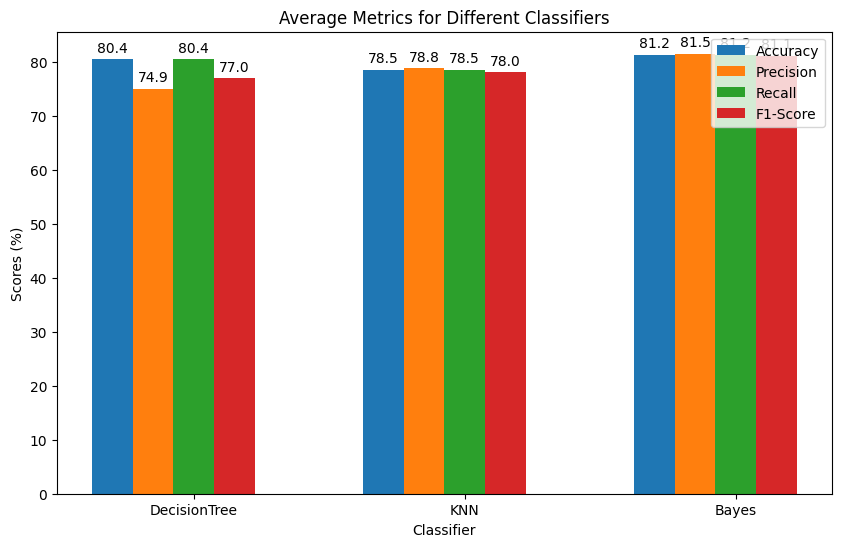

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits=10, shuffle=True)

# Create empty lists to store the metrics for each classifier
classifier_names = ["DecisionTree", "KNN", "Bayes"]
accuracies = []
precisions = []
recalls = []
f1_scores = []

for classifier in [DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=max_index, min_samples_leaf=max_index),
                  KNeighborsClassifier(n_neighbors=10),
                  GaussianNB()]:
    total_accuracy = 0
    total_precision = 0
    total_recall = 0
    total_f1 = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_smote.iloc[train_index], X_smote.iloc[test_index]
        y_train, y_test = y_smote.iloc[train_index], y_smote.iloc[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        total_accuracy += accuracy_score(y_test, y_pred)
        total_precision += precision_score(y_test, y_pred, average='weighted')
        total_recall += recall_score(y_test, y_pred, average='weighted')
        total_f1 += f1_score(y_test, y_pred, average='weighted')

    # Calculate the average values after 10-fold cross-validation and convert to percentages
    avg_accuracy = (total_accuracy / 10) * 100
    avg_precision = (total_precision / 10) * 100
    avg_recall = (total_recall / 10) * 100
    avg_f1 = (total_f1 / 10) * 100

    accuracies.append(avg_accuracy)
    precisions.append(avg_precision)
    recalls.append(avg_recall)
    f1_scores.append(avg_f1)

# Create a DataFrame to display the average results
results_df = pd.DataFrame({
    "Classifier": classifier_names,
    "Accuracy (%)": accuracies,
    "Precision (%)": precisions,
    "Recall (%)": recalls,
    "F1-Score (%)": f1_scores
})

print(results_df)

# Plot bar chart with adjusted gap between columns
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
index = np.arange(len(classifier_names))

rects1 = ax.bar(index - 2 * bar_width, results_df["Accuracy (%)"], bar_width, label='Accuracy')
rects2 = ax.bar(index - bar_width, results_df["Precision (%)"], bar_width, label='Precision')
rects3 = ax.bar(index, results_df["Recall (%)"], bar_width, label='Recall')
rects4 = ax.bar(index + bar_width, results_df["F1-Score (%)"], bar_width, label='F1-Score')

ax.set_xlabel('Classifier')
ax.set_ylabel('Scores (%)')
ax.set_title('Average Metrics for Different Classifiers')
ax.set_xticks(index)
ax.set_xticklabels(classifier_names)
ax.legend()

# Add numeric values above each column
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')
for rect in rects3:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')
for rect in rects4:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()
